In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


# make dataset to train

In [4]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [5]:
# hyper parameters
seq_length = 30 # day
data_dim = 5 # open, high, low, volume, close
hidden_dim = 10
output_dim = 1 # close
learning_rate = 0.01
iterations = 500

In [6]:
# load data
xy = np.loadtxt("google_stock.csv", delimiter=",")
xy = xy[::-1]  # reverse order 최근순으로 정렬되어있기때문에, 바꿔줘야함

In [7]:
# split train-test set
train_size = int(len(xy) * 0.8) # 80%
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [8]:
train_set.shape

(585, 5)

In [9]:
test_set.shape

(177, 5)

In [10]:
# scaling data 모든값을 [0,1] 사의 값으로 변환, 학습의 부담을 덜어줌
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

In [11]:
# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]
 [1.59015228e-01 1.78651664e-01 1.41728657e-01 3.93806579e-01
  1.60537160e-01]
 [1.65432462e-01 2.00836760e-01 1.93494176e-01 2.81733441e-01
  2.19506258e-01]
 [2.24153170e-01 2.36122043e-01 2.34090397e-01 2.97830958e-01
  2.52036220e-01]
 [2.42714811e-01 2.34863171e-01 1.87372512e-01 3.61109617e-01
  1.70394577e-01]
 [1.30758794e-01 1.49797358e-01 1.39509169e-01 3.51071076e-01
  1.33956895e-01]
 [1.50424570e-01 1.63748242e-01 1.503561

 [0.12503183 0.13642499 0.15017717 0.14748588 0.14272319]] -> [0.12005085]
[[0.36343379 0.37038987 0.26716885 0.01247647 0.26210501]
 [0.25944763 0.31067372 0.27411389 0.45632338 0.27175127]
 [0.27600815 0.27831457 0.19847038 0.57017119 0.17810464]
 [0.15901523 0.17865166 0.14172866 0.39380658 0.16053716]
 [0.16543246 0.20083676 0.19349418 0.28173344 0.21950626]
 [0.22415317 0.23612204 0.2340904  0.29783096 0.25203622]
 [0.24271481 0.23486317 0.18737251 0.36110962 0.17039458]
 [0.13075879 0.14979736 0.13950917 0.35107108 0.1339569 ]
 [0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]
 [0.12220255 0.12138537 0.12372168 0.16807385 0.1148050

 [0.121064   0.13696956 0.13868579 0.15925428 0.13103494]] -> [0.16331841]
[[0.22415317 0.23612204 0.2340904  0.29783096 0.25203622]
 [0.24271481 0.23486317 0.18737251 0.36110962 0.17039458]
 [0.13075879 0.14979736 0.13950917 0.35107108 0.1339569 ]
 [0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]
 [0.12220255 0.12138537 0.12372168 0.16807385 0.11480508]
 [0.09611997 0.09773711 0.09973633 0.18754145 0.08319064]
 [0.07773084 0.07698102 0.05455784 0.29825222 0.08660558]
 [0.0767648  0.11393376 0.1029582  0.24120283 0.12374741]
 [0.11368095 0.10896575 0.12515372 0.15624272 0.12008597]
 [0.11199043 0.12574072 0.13002235 0.17008156 0.1365974

 [0.24123123 0.2445266  0.26290866 0.1473604  0.24337573]] -> [0.23774277]
[[0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]
 [0.12220255 0.12138537 0.12372168 0.16807385 0.11480508]
 [0.09611997 0.09773711 0.09973633 0.18754145 0.08319064]
 [0.07773084 0.07698102 0.05455784 0.29825222 0.08660558]
 [0.0767648  0.11393376 0.1029582  0.24120283 0.12374741]
 [0.11368095 0.10896575 0.12515372 0.15624272 0.12008597]
 [0.11199043 0.12574072 0.13002235 0.17008156 0.13659745]
 [0.13493355 0.12938155 0.13621566 0.15063189 0.12455713]
 [0.10408962 0.11202828 0.12085782 0.09108183 0.1241346 ]
 [0.10550415 0.10491674 0.09844758 0.15067671 0.07952921]
 [0.07293507 0.07044801 0.05634778 0.28828538 0.0612928 ]
 [0.04764591 0.07231955 0.06762455 0.1804607  0.0649541

 [0.16163736 0.17909399 0.18325562 0.16209555 0.18345577]] -> [0.21598574]
[[0.12220255 0.12138537 0.12372168 0.16807385 0.11480508]
 [0.09611997 0.09773711 0.09973633 0.18754145 0.08319064]
 [0.07773084 0.07698102 0.05455784 0.29825222 0.08660558]
 [0.0767648  0.11393376 0.1029582  0.24120283 0.12374741]
 [0.11368095 0.10896575 0.12515372 0.15624272 0.12008597]
 [0.11199043 0.12574072 0.13002235 0.17008156 0.13659745]
 [0.13493355 0.12938155 0.13621566 0.15063189 0.12455713]
 [0.10408962 0.11202828 0.12085782 0.09108183 0.1241346 ]
 [0.10550415 0.10491674 0.09844758 0.15067671 0.07952921]
 [0.07293507 0.07044801 0.05634778 0.28828538 0.0612928 ]
 [0.04764591 0.07231955 0.06762455 0.1804607  0.06495413]
 [0.05554661 0.08140447 0.05956976 0.21793493 0.09216809]
 [0.09957004 0.11641756 0.11258831 0.17070897 0.13156305]
 [0.12503183 0.13642499 0.15017717 0.14748588 0.14272319]
 [0.13231142 0.12597895 0.13506998 0.10610379 0.12005085]
 [0.10712562 0.10171823 0.10689609 0.15204804 0.0965685

 [0.21856409 0.21744159 0.24150081 0.0978937  0.23337718]] -> [0.20700829]
[[0.11199043 0.12574072 0.13002235 0.17008156 0.13659745]
 [0.13493355 0.12938155 0.13621566 0.15063189 0.12455713]
 [0.10408962 0.11202828 0.12085782 0.09108183 0.1241346 ]
 [0.10550415 0.10491674 0.09844758 0.15067671 0.07952921]
 [0.07293507 0.07044801 0.05634778 0.28828538 0.0612928 ]
 [0.04764591 0.07231955 0.06762455 0.1804607  0.06495413]
 [0.05554661 0.08140447 0.05956976 0.21793493 0.09216809]
 [0.09957004 0.11641756 0.11258831 0.17070897 0.13156305]
 [0.12503183 0.13642499 0.15017717 0.14748588 0.14272319]
 [0.13231142 0.12597895 0.13506998 0.10610379 0.12005085]
 [0.10712562 0.10171823 0.10689609 0.15204804 0.09656857]
 [0.09225582 0.08786959 0.09980797 0.13241015 0.09885706]
 [0.08642518 0.11502249 0.10747977 0.11381196 0.12783116]
 [0.121064   0.13696956 0.13868579 0.15925428 0.13103494]
 [0.13196639 0.14701743 0.15876896 0.10650713 0.16331841]
 [0.16036071 0.17565744 0.19052296 0.1441158  0.1848640

 [0.1732296  0.19593705 0.20205026 0.1554002  0.21411979]] -> [0.21950626]
[[0.04764591 0.07231955 0.06762455 0.1804607  0.06495413]
 [0.05554661 0.08140447 0.05956976 0.21793493 0.09216809]
 [0.09957004 0.11641756 0.11258831 0.17070897 0.13156305]
 [0.12503183 0.13642499 0.15017717 0.14748588 0.14272319]
 [0.13231142 0.12597895 0.13506998 0.10610379 0.12005085]
 [0.10712562 0.10171823 0.10689609 0.15204804 0.09656857]
 [0.09225582 0.08786959 0.09980797 0.13241015 0.09885706]
 [0.08642518 0.11502249 0.10747977 0.11381196 0.12783116]
 [0.121064   0.13696956 0.13868579 0.15925428 0.13103494]
 [0.13196639 0.14701743 0.15876896 0.10650713 0.16331841]
 [0.16036071 0.17565744 0.19052296 0.1441158  0.18486407]
 [0.18150985 0.19620923 0.20097623 0.17246572 0.21176107]
 [0.21166373 0.23826577 0.23910232 0.18788205 0.25840845]
 [0.24123123 0.2445266  0.26290866 0.1473604  0.24337573]
 [0.23702205 0.23146036 0.25471058 0.12065968 0.23774277]
 [0.22822425 0.22244355 0.24468696 0.15803531 0.2370739

 [0.2436118  0.28576638 0.27801585 0.17579995 0.30311943]] -> [0.29378991]
[[0.10712562 0.10171823 0.10689609 0.15204804 0.09656857]
 [0.09225582 0.08786959 0.09980797 0.13241015 0.09885706]
 [0.08642518 0.11502249 0.10747977 0.11381196 0.12783116]
 [0.121064   0.13696956 0.13868579 0.15925428 0.13103494]
 [0.13196639 0.14701743 0.15876896 0.10650713 0.16331841]
 [0.16036071 0.17565744 0.19052296 0.1441158  0.18486407]
 [0.18150985 0.19620923 0.20097623 0.17246572 0.21176107]
 [0.21166373 0.23826577 0.23910232 0.18788205 0.25840845]
 [0.24123123 0.2445266  0.26290866 0.1473604  0.24337573]
 [0.23702205 0.23146036 0.25471058 0.12065968 0.23774277]
 [0.22822425 0.22244355 0.24468696 0.15803531 0.23707395]
 [0.22787922 0.22091228 0.20824335 0.12791073 0.21609131]
 [0.19437874 0.19178579 0.19685934 0.16659496 0.18444154]
 [0.16163736 0.17909399 0.18325562 0.16209555 0.18345577]
 [0.17854291 0.20066662 0.20366109 0.15068567 0.21598574]
 [0.21877102 0.21124885 0.21969923 0.15495205 0.2245406

 [0.30602415 0.30441289 0.33232315 0.09396791 0.31609272]] -> [0.32452438]
[[0.16036071 0.17565744 0.19052296 0.1441158  0.18486407]
 [0.18150985 0.19620923 0.20097623 0.17246572 0.21176107]
 [0.21166373 0.23826577 0.23910232 0.18788205 0.25840845]
 [0.24123123 0.2445266  0.26290866 0.1473604  0.24337573]
 [0.23702205 0.23146036 0.25471058 0.12065968 0.23774277]
 [0.22822425 0.22244355 0.24468696 0.15803531 0.23707395]
 [0.22787922 0.22091228 0.20824335 0.12791073 0.21609131]
 [0.19437874 0.19178579 0.19685934 0.16659496 0.18444154]
 [0.16163736 0.17909399 0.18325562 0.16209555 0.18345577]
 [0.17854291 0.20066662 0.20366109 0.15068567 0.21598574]
 [0.21877102 0.21124885 0.21969923 0.15495205 0.22454065]
 [0.21563135 0.22771748 0.24515233 0.1308237  0.24492472]
 [0.2272238  0.23009945 0.25181101 0.12044456 0.23939734]
 [0.21856409 0.21744159 0.24150081 0.0978937  0.23337718]
 [0.21614889 0.21101061 0.21801654 0.13000807 0.20700829]
 [0.19876043 0.19164981 0.20763491 0.10868513 0.2084517

 [0.24585427 0.2742995  0.27726411 0.12089271 0.27653916]] -> [0.30498538]
[[0.22822425 0.22244355 0.24468696 0.15803531 0.23707395]
 [0.22787922 0.22091228 0.20824335 0.12791073 0.21609131]
 [0.19437874 0.19178579 0.19685934 0.16659496 0.18444154]
 [0.16163736 0.17909399 0.18325562 0.16209555 0.18345577]
 [0.17854291 0.20066662 0.20366109 0.15068567 0.21598574]
 [0.21877102 0.21124885 0.21969923 0.15495205 0.22454065]
 [0.21563135 0.22771748 0.24515233 0.1308237  0.24492472]
 [0.2272238  0.23009945 0.25181101 0.12044456 0.23939734]
 [0.21856409 0.21744159 0.24150081 0.0978937  0.23337718]
 [0.21614889 0.21101061 0.21801654 0.13000807 0.20700829]
 [0.19876043 0.19164981 0.20763491 0.10868513 0.20845171]
 [0.18841021 0.18253074 0.1931721  0.15188671 0.18211815]
 [0.17095249 0.16789929 0.18533203 0.12876221 0.17764699]
 [0.1732296  0.19593705 0.20205026 0.1554002  0.21411979]
 [0.20559153 0.20083676 0.21819555 0.21949449 0.21950626]
 [0.21459647 0.20961555 0.22493288 0.40337008 0.2246462

 [0.29284465 0.28927102 0.29015181 0.2696603  0.28579823]] -> [0.36096206]
[[0.21877102 0.21124885 0.21969923 0.15495205 0.22454065]
 [0.21563135 0.22771748 0.24515233 0.1308237  0.24492472]
 [0.2272238  0.23009945 0.25181101 0.12044456 0.23939734]
 [0.21856409 0.21744159 0.24150081 0.0978937  0.23337718]
 [0.21614889 0.21101061 0.21801654 0.13000807 0.20700829]
 [0.19876043 0.19164981 0.20763491 0.10868513 0.20845171]
 [0.18841021 0.18253074 0.1931721  0.15188671 0.18211815]
 [0.17095249 0.16789929 0.18533203 0.12876221 0.17764699]
 [0.1732296  0.19593705 0.20205026 0.1554002  0.21411979]
 [0.20559153 0.20083676 0.21819555 0.21949449 0.21950626]
 [0.21459647 0.20961555 0.22493288 0.40337008 0.22464623]
 [0.2087312  0.23486317 0.23874431 0.13703505 0.25488793]
 [0.24337024 0.26087965 0.26294437 0.19711392 0.25372613]
 [0.2436118  0.28576638 0.27801585 0.17579995 0.30311943]
 [0.2979164  0.29423904 0.30175077 0.15541812 0.29378991]
 [0.28473691 0.28546025 0.30873152 0.19978489 0.2981554

 [0.35122054 0.35225378 0.37306244 0.09206776 0.35487145]] -> [0.33962757]
[[0.19876043 0.19164981 0.20763491 0.10868513 0.20845171]
 [0.18841021 0.18253074 0.1931721  0.15188671 0.18211815]
 [0.17095249 0.16789929 0.18533203 0.12876221 0.17764699]
 [0.1732296  0.19593705 0.20205026 0.1554002  0.21411979]
 [0.20559153 0.20083676 0.21819555 0.21949449 0.21950626]
 [0.21459647 0.20961555 0.22493288 0.40337008 0.22464623]
 [0.2087312  0.23486317 0.23874431 0.13703505 0.25488793]
 [0.24337024 0.26087965 0.26294437 0.19711392 0.25372613]
 [0.2436118  0.28576638 0.27801585 0.17579995 0.30311943]
 [0.2979164  0.29423904 0.30175077 0.15541812 0.29378991]
 [0.28473691 0.28546025 0.30873152 0.19978489 0.29815549]
 [0.28984307 0.28443941 0.3121324  0.11703863 0.29125515]
 [0.2886701  0.3008741  0.31893437 0.12906695 0.31727197]
 [0.30602415 0.30441289 0.33232315 0.09396791 0.31609272]
 [0.30602415 0.30294973 0.33422056 0.06329659 0.32452438]
 [0.30743868 0.30778134 0.32945929 0.09471184 0.3157934

 [0.29653629 0.2983222  0.2951278  0.18775657 0.27829953]] -> [0.25883077]
[[0.21459647 0.20961555 0.22493288 0.40337008 0.22464623]
 [0.2087312  0.23486317 0.23874431 0.13703505 0.25488793]
 [0.24337024 0.26087965 0.26294437 0.19711392 0.25372613]
 [0.2436118  0.28576638 0.27801585 0.17579995 0.30311943]
 [0.2979164  0.29423904 0.30175077 0.15541812 0.29378991]
 [0.28473691 0.28546025 0.30873152 0.19978489 0.29815549]
 [0.28984307 0.28443941 0.3121324  0.11703863 0.29125515]
 [0.2886701  0.3008741  0.31893437 0.12906695 0.31727197]
 [0.30602415 0.30441289 0.33232315 0.09396791 0.31609272]
 [0.30602415 0.30294973 0.33422056 0.06329659 0.32452438]
 [0.30743868 0.30778134 0.32945929 0.09471184 0.31579343]
 [0.286393   0.28429655 0.28129162 0.17044008 0.27650404]
 [0.26541637 0.27474183 0.29289407 0.09938155 0.29407152]
 [0.24585427 0.2742995  0.27726411 0.12089271 0.27653916]
 [0.26655492 0.28879475 0.30021137 0.14464462 0.30498538]
 [0.30343643 0.30363029 0.32387464 0.16546563 0.3250171

 [0.25306503 0.25150194 0.26326667 0.0988617  0.24929009]] -> [0.26833633]
[[0.28473691 0.28546025 0.30873152 0.19978489 0.29815549]
 [0.28984307 0.28443941 0.3121324  0.11703863 0.29125515]
 [0.2886701  0.3008741  0.31893437 0.12906695 0.31727197]
 [0.30602415 0.30441289 0.33232315 0.09396791 0.31609272]
 [0.30602415 0.30294973 0.33422056 0.06329659 0.32452438]
 [0.30743868 0.30778134 0.32945929 0.09471184 0.31579343]
 [0.286393   0.28429655 0.28129162 0.17044008 0.27650404]
 [0.26541637 0.27474183 0.29289407 0.09938155 0.29407152]
 [0.24585427 0.2742995  0.27726411 0.12089271 0.27653916]
 [0.26655492 0.28879475 0.30021137 0.14464462 0.30498538]
 [0.30343643 0.30363029 0.32387464 0.16546563 0.32501716]
 [0.31426977 0.30565469 0.31861207 0.14476114 0.32470042]
 [0.32206712 0.31448449 0.33880282 0.12451376 0.31723685]
 [0.29284465 0.28927102 0.29015181 0.2696603  0.28579823]
 [0.3393177  0.34306662 0.3380868  0.35907502 0.36096206]
 [0.33500505 0.3349003  0.34966056 0.18411759 0.3412116

 [0.28128683 0.2787571  0.29827824 0.08761316 0.28903713]] -> [0.28491826]
[[0.30743868 0.30778134 0.32945929 0.09471184 0.31579343]
 [0.286393   0.28429655 0.28129162 0.17044008 0.27650404]
 [0.26541637 0.27474183 0.29289407 0.09938155 0.29407152]
 [0.24585427 0.2742995  0.27726411 0.12089271 0.27653916]
 [0.26655492 0.28879475 0.30021137 0.14464462 0.30498538]
 [0.30343643 0.30363029 0.32387464 0.16546563 0.32501716]
 [0.31426977 0.30565469 0.31861207 0.14476114 0.32470042]
 [0.32206712 0.31448449 0.33880282 0.12451376 0.31723685]
 [0.29284465 0.28927102 0.29015181 0.2696603  0.28579823]
 [0.3393177  0.34306662 0.3380868  0.35907502 0.36096206]
 [0.33500505 0.3349003  0.34966056 0.18411759 0.34121168]
 [0.3314513  0.35276421 0.36887412 0.15158197 0.35976514]
 [0.34011122 0.34663936 0.37567587 0.10981447 0.36413051]
 [0.35122054 0.35225378 0.37306244 0.09206776 0.35487145]
 [0.33034738 0.32625771 0.35609378 0.08286278 0.33962757]
 [0.32230868 0.32843538 0.34794237 0.08773864 0.3451900

 [0.30764561 0.30121438 0.335008   0.08128529 0.31973648]] -> [0.31688477]
[[0.30343643 0.30363029 0.32387464 0.16546563 0.32501716]
 [0.31426977 0.30565469 0.31861207 0.14476114 0.32470042]
 [0.32206712 0.31448449 0.33880282 0.12451376 0.31723685]
 [0.29284465 0.28927102 0.29015181 0.2696603  0.28579823]
 [0.3393177  0.34306662 0.3380868  0.35907502 0.36096206]
 [0.33500505 0.3349003  0.34966056 0.18411759 0.34121168]
 [0.3314513  0.35276421 0.36887412 0.15158197 0.35976514]
 [0.34011122 0.34663936 0.37567587 0.10981447 0.36413051]
 [0.35122054 0.35225378 0.37306244 0.09206776 0.35487145]
 [0.33034738 0.32625771 0.35609378 0.08286278 0.33962757]
 [0.32230868 0.32843538 0.34794237 0.08773864 0.34519007]
 [0.32465462 0.31890794 0.34351041 0.12027427 0.32762237]
 [0.31706442 0.31822758 0.34524656 0.09039168 0.3339946 ]
 [0.29653629 0.2983222  0.2951278  0.18775657 0.27829953]
 [0.26134529 0.27215599 0.26953141 0.17453617 0.25883077]
 [0.2566532  0.27008035 0.27400631 0.12722058 0.2837564

 [0.25844718 0.26293488 0.28474617 0.11517433 0.2698502 ]] -> [0.27829953]
[[0.33500505 0.3349003  0.34966056 0.18411759 0.34121168]
 [0.3314513  0.35276421 0.36887412 0.15158197 0.35976514]
 [0.34011122 0.34663936 0.37567587 0.10981447 0.36413051]
 [0.35122054 0.35225378 0.37306244 0.09206776 0.35487145]
 [0.33034738 0.32625771 0.35609378 0.08286278 0.33962757]
 [0.32230868 0.32843538 0.34794237 0.08773864 0.34519007]
 [0.32465462 0.31890794 0.34351041 0.12027427 0.32762237]
 [0.31706442 0.31822758 0.34524656 0.09039168 0.3339946 ]
 [0.29653629 0.2983222  0.2951278  0.18775657 0.27829953]
 [0.26134529 0.27215599 0.26953141 0.17453617 0.25883077]
 [0.2566532  0.27008035 0.27400631 0.12722058 0.28375646]
 [0.26013769 0.25861348 0.26867231 0.13832571 0.25531025]
 [0.23160549 0.25425813 0.25932878 0.118885   0.25990121]
 [0.25306503 0.25150194 0.26326667 0.0988617  0.24929009]
 [0.23774653 0.25272687 0.26058182 0.13326163 0.26833633]
 [0.25993076 0.25354342 0.28080828 0.10816528 0.265203 

 [0.30819757 0.30818972 0.3379078  0.14559469 0.32927716]] -> [0.34209186]
[[0.32230868 0.32843538 0.34794237 0.08773864 0.34519007]
 [0.32465462 0.31890794 0.34351041 0.12027427 0.32762237]
 [0.31706442 0.31822758 0.34524656 0.09039168 0.3339946 ]
 [0.29653629 0.2983222  0.2951278  0.18775657 0.27829953]
 [0.26134529 0.27215599 0.26953141 0.17453617 0.25883077]
 [0.2566532  0.27008035 0.27400631 0.12722058 0.28375646]
 [0.26013769 0.25861348 0.26867231 0.13832571 0.25531025]
 [0.23160549 0.25425813 0.25932878 0.118885   0.25990121]
 [0.25306503 0.25150194 0.26326667 0.0988617  0.24929009]
 [0.23774653 0.25272687 0.26058182 0.13326163 0.26833633]
 [0.25993076 0.25354342 0.28080828 0.10816528 0.265203  ]
 [0.24105872 0.23792549 0.26247901 0.13750112 0.24707228]
 [0.25068446 0.26888937 0.27991326 0.12828717 0.28949478]
 [0.28128683 0.2787571  0.29827824 0.08761316 0.28903713]
 [0.28708306 0.28379279 0.2969895  0.1354486  0.28491826]
 [0.28104527 0.30124832 0.3166073  0.11438559 0.3154764

 [0.2979164  0.29148285 0.3110943  0.14284306 0.29245207]] -> [0.28358042]
[[0.2566532  0.27008035 0.27400631 0.12722058 0.28375646]
 [0.26013769 0.25861348 0.26867231 0.13832571 0.25531025]
 [0.23160549 0.25425813 0.25932878 0.118885   0.25990121]
 [0.25306503 0.25150194 0.26326667 0.0988617  0.24929009]
 [0.23774653 0.25272687 0.26058182 0.13326163 0.26833633]
 [0.25993076 0.25354342 0.28080828 0.10816528 0.265203  ]
 [0.24105872 0.23792549 0.26247901 0.13750112 0.24707228]
 [0.25068446 0.26888937 0.27991326 0.12828717 0.28949478]
 [0.28128683 0.2787571  0.29827824 0.08761316 0.28903713]
 [0.28708306 0.28379279 0.2969895  0.1354486  0.28491826]
 [0.28104527 0.30124832 0.3166073  0.11438559 0.31547648]
 [0.31171669 0.31087781 0.34524656 0.08700367 0.33202308]
 [0.3147529  0.30870014 0.34012728 0.09221117 0.32367932]
 [0.30764561 0.30121438 0.335008   0.08128529 0.31973648]
 [0.30685209 0.30371858 0.33321817 0.07000986 0.31688477]
 [0.31075065 0.30291557 0.32734716 0.12131397 0.3085763

 [0.33414248 0.34197789 0.36493623 0.33420274 0.36448258]] -> [0.33381857]
[[0.25993076 0.25354342 0.28080828 0.10816528 0.265203  ]
 [0.24105872 0.23792549 0.26247901 0.13750112 0.24707228]
 [0.25068446 0.26888937 0.27991326 0.12828717 0.28949478]
 [0.28128683 0.2787571  0.29827824 0.08761316 0.28903713]
 [0.28708306 0.28379279 0.2969895  0.1354486  0.28491826]
 [0.28104527 0.30124832 0.3166073  0.11438559 0.31547648]
 [0.31171669 0.31087781 0.34524656 0.08700367 0.33202308]
 [0.3147529  0.30870014 0.34012728 0.09221117 0.32367932]
 [0.30764561 0.30121438 0.335008   0.08128529 0.31973648]
 [0.30685209 0.30371858 0.33321817 0.07000986 0.31688477]
 [0.31075065 0.30291557 0.32734716 0.12131397 0.30857635]
 [0.29881339 0.29202721 0.31868372 0.14624899 0.30033818]
 [0.28504752 0.28076463 0.29549655 0.15195841 0.27618709]
 [0.25844718 0.26293488 0.28474617 0.11517433 0.2698502 ]
 [0.2645538  0.25881756 0.28463509 0.09642377 0.27829953]
 [0.26634799 0.27851886 0.29938799 0.14076365 0.2984722

 [0.28087297 0.28335047 0.31181032 0.12868155 0.29766251]] -> [0.29505729]
[[0.28104527 0.30124832 0.3166073  0.11438559 0.31547648]
 [0.31171669 0.31087781 0.34524656 0.08700367 0.33202308]
 [0.3147529  0.30870014 0.34012728 0.09221117 0.32367932]
 [0.30764561 0.30121438 0.335008   0.08128529 0.31973648]
 [0.30685209 0.30371858 0.33321817 0.07000986 0.31688477]
 [0.31075065 0.30291557 0.32734716 0.12131397 0.30857635]
 [0.29881339 0.29202721 0.31868372 0.14624899 0.30033818]
 [0.28504752 0.28076463 0.29549655 0.15195841 0.27618709]
 [0.25844718 0.26293488 0.28474617 0.11517433 0.2698502 ]
 [0.2645538  0.25881756 0.28463509 0.09642377 0.27829953]
 [0.26634799 0.27851886 0.29938799 0.14076365 0.29847223]
 [0.29446633 0.29607643 0.31302742 0.10820113 0.30061979]
 [0.29446633 0.30631838 0.32813461 0.12998118 0.31484279]
 [0.30819757 0.30818972 0.3379078  0.14559469 0.32927716]
 [0.31723694 0.32595137 0.35348035 0.12755221 0.34209186]
 [0.32517217 0.31652618 0.33092704 0.11466344 0.3114278

 [0.27048812 0.2764603  0.30407761 0.1016223  0.29125515]] -> [0.29854269]
[[0.31075065 0.30291557 0.32734716 0.12131397 0.30857635]
 [0.29881339 0.29202721 0.31868372 0.14624899 0.30033818]
 [0.28504752 0.28076463 0.29549655 0.15195841 0.27618709]
 [0.25844718 0.26293488 0.28474617 0.11517433 0.2698502 ]
 [0.2645538  0.25881756 0.28463509 0.09642377 0.27829953]
 [0.26634799 0.27851886 0.29938799 0.14076365 0.29847223]
 [0.29446633 0.29607643 0.31302742 0.10820113 0.30061979]
 [0.29446633 0.30631838 0.32813461 0.12998118 0.31484279]
 [0.30819757 0.30818972 0.3379078  0.14559469 0.32927716]
 [0.31723694 0.32595137 0.35348035 0.12755221 0.34209186]
 [0.32517217 0.31652618 0.33092704 0.11466344 0.31142785]
 [0.29964133 0.29781178 0.31997246 0.08688716 0.31878584]
 [0.29570834 0.29206137 0.31753804 0.10872995 0.31262499]
 [0.2979164  0.29148285 0.3110943  0.14284306 0.29245207]
 [0.27010846 0.26871923 0.28871977 0.14247558 0.28358042]
 [0.26948745 0.29100637 0.30465034 0.13197096 0.3076961

 [0.21759805 0.23530549 0.20222927 0.27552209 0.18285742]] -> [0.1431455]
[[0.26634799 0.27851886 0.29938799 0.14076365 0.29847223]
 [0.29446633 0.29607643 0.31302742 0.10820113 0.30061979]
 [0.29446633 0.30631838 0.32813461 0.12998118 0.31484279]
 [0.30819757 0.30818972 0.3379078  0.14559469 0.32927716]
 [0.31723694 0.32595137 0.35348035 0.12755221 0.34209186]
 [0.32517217 0.31652618 0.33092704 0.11466344 0.31142785]
 [0.29964133 0.29781178 0.31997246 0.08688716 0.31878584]
 [0.29570834 0.29206137 0.31753804 0.10872995 0.31262499]
 [0.2979164  0.29148285 0.3110943  0.14284306 0.29245207]
 [0.27010846 0.26871923 0.28871977 0.14247558 0.28358042]
 [0.26948745 0.29100637 0.30465034 0.13197096 0.30769617]
 [0.29450074 0.31149027 0.32654153 0.1510173  0.32466509]
 [0.31861705 0.31836357 0.34882644 0.12876221 0.34050775]
 [0.33414248 0.34197789 0.36493623 0.33420274 0.36448258]
 [0.34214676 0.3333657  0.34331344 0.15072152 0.33381857]
 [0.31809951 0.30921056 0.33450692 0.13117325 0.31185038

 [0.11247335 0.11910566 0.07507078 0.49577844 0.06555259]] -> [0.09959632]
[[0.32517217 0.31652618 0.33092704 0.11466344 0.31142785]
 [0.29964133 0.29781178 0.31997246 0.08688716 0.31878584]
 [0.29570834 0.29206137 0.31753804 0.10872995 0.31262499]
 [0.2979164  0.29148285 0.3110943  0.14284306 0.29245207]
 [0.27010846 0.26871923 0.28871977 0.14247558 0.28358042]
 [0.26948745 0.29100637 0.30465034 0.13197096 0.30769617]
 [0.29450074 0.31149027 0.32654153 0.1510173  0.32466509]
 [0.31861705 0.31836357 0.34882644 0.12876221 0.34050775]
 [0.33414248 0.34197789 0.36493623 0.33420274 0.36448258]
 [0.34214676 0.3333657  0.34331344 0.15072152 0.33381857]
 [0.31809951 0.30921056 0.33450692 0.13117325 0.31185038]
 [0.29950345 0.31866991 0.33278852 0.15418123 0.33600125]
 [0.32051449 0.31305548 0.31009191 0.17191001 0.29048055]
 [0.28087297 0.28335047 0.31181032 0.12868155 0.29766251]
 [0.26600296 0.27974379 0.29931634 0.11423322 0.29505729]
 [0.28387455 0.28539215 0.30533065 0.14464462 0.2985778

 [0.17150466 0.16640218 0.17265905 0.17614054 0.16627549]] -> [0.16976089]
[[0.26948745 0.29100637 0.30465034 0.13197096 0.30769617]
 [0.29450074 0.31149027 0.32654153 0.1510173  0.32466509]
 [0.31861705 0.31836357 0.34882644 0.12876221 0.34050775]
 [0.33414248 0.34197789 0.36493623 0.33420274 0.36448258]
 [0.34214676 0.3333657  0.34331344 0.15072152 0.33381857]
 [0.31809951 0.30921056 0.33450692 0.13117325 0.31185038]
 [0.29950345 0.31866991 0.33278852 0.15418123 0.33600125]
 [0.32051449 0.31305548 0.31009191 0.17191001 0.29048055]
 [0.28087297 0.28335047 0.31181032 0.12868155 0.29766251]
 [0.26600296 0.27974379 0.29931634 0.11423322 0.29505729]
 [0.28387455 0.28539215 0.30533065 0.14464462 0.29857781]
 [0.28070045 0.27766816 0.28442388 0.12884288 0.26657617]
 [0.25068446 0.25837524 0.2712141  0.10491171 0.27294819]
 [0.27048812 0.2764603  0.30407761 0.1016223  0.29125515]
 [0.2903262  0.28930518 0.31102265 0.10815631 0.29854269]
 [0.27514579 0.26980817 0.27271756 0.17060142 0.2506279

 [0.22322155 0.2163868  0.24053414 0.18168863 0.23422225]] -> [0.22063294]
[[0.31809951 0.30921056 0.33450692 0.13117325 0.31185038]
 [0.29950345 0.31866991 0.33278852 0.15418123 0.33600125]
 [0.32051449 0.31305548 0.31009191 0.17191001 0.29048055]
 [0.28087297 0.28335047 0.31181032 0.12868155 0.29766251]
 [0.26600296 0.27974379 0.29931634 0.11423322 0.29505729]
 [0.28387455 0.28539215 0.30533065 0.14464462 0.29857781]
 [0.28070045 0.27766816 0.28442388 0.12884288 0.26657617]
 [0.25068446 0.25837524 0.2712141  0.10491171 0.27294819]
 [0.27048812 0.2764603  0.30407761 0.1016223  0.29125515]
 [0.2903262  0.28930518 0.31102265 0.10815631 0.29854269]
 [0.27514579 0.26980817 0.27271756 0.17060142 0.25062793]
 [0.24468131 0.26507839 0.25034326 0.17772699 0.28146798]
 [0.26403626 0.25694623 0.25596362 0.22558932 0.24055914]
 [0.21759805 0.23530549 0.20222927 0.27552209 0.18285742]
 [0.17367809 0.18212236 0.16302915 0.23068029 0.1431455 ]
 [0.15266704 0.17426238 0.1632798  0.19849422 0.1597976

 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]] -> [0.19341898]
[[0.28387455 0.28539215 0.30533065 0.14464462 0.29857781]
 [0.28070045 0.27766816 0.28442388 0.12884288 0.26657617]
 [0.25068446 0.25837524 0.2712141  0.10491171 0.27294819]
 [0.27048812 0.2764603  0.30407761 0.1016223  0.29125515]
 [0.2903262  0.28930518 0.31102265 0.10815631 0.29854269]
 [0.27514579 0.26980817 0.27271756 0.17060142 0.25062793]
 [0.24468131 0.26507839 0.25034326 0.17772699 0.28146798]
 [0.26403626 0.25694623 0.25596362 0.22558932 0.24055914]
 [0.21759805 0.23530549 0.20222927 0.27552209 0.18285742]
 [0.17367809 0.18212236 0.16302915 0.23068029 0.1431455 ]
 [0.15266704 0.17426238 0.1632798  0.19849422 0.15979768]
 [0.12544569 0.12529839 0.11004653 0.33265215 0.13195025]
 [0.08400998 0.11383151 0.09823286 0.33168414 0.11251682]
 [0.11247335 0.11910566 0.07507078 0.49577844 0.06555259]
 [0.05106156 0.0877334  0.07353138 0.2330017  0.09959632]
 [0.10536606 0.10484864 0.11294611 0.20868513 0.1196634

 [0.17950894 0.17252703 0.1954273  0.11486959 0.18254047]] -> [0.15476328]
[[0.27514579 0.26980817 0.27271756 0.17060142 0.25062793]
 [0.24468131 0.26507839 0.25034326 0.17772699 0.28146798]
 [0.26403626 0.25694623 0.25596362 0.22558932 0.24055914]
 [0.21759805 0.23530549 0.20222927 0.27552209 0.18285742]
 [0.17367809 0.18212236 0.16302915 0.23068029 0.1431455 ]
 [0.15266704 0.17426238 0.1632798  0.19849422 0.15979768]
 [0.12544569 0.12529839 0.11004653 0.33265215 0.13195025]
 [0.08400998 0.11383151 0.09823286 0.33168414 0.11251682]
 [0.11247335 0.11910566 0.07507078 0.49577844 0.06555259]
 [0.05106156 0.0877334  0.07353138 0.2330017  0.09959632]
 [0.10536606 0.10484864 0.11294611 0.20868513 0.11966344]
 [0.12158155 0.14911679 0.1476356  0.26093932 0.14138535]
 [0.15411599 0.17436442 0.17287399 0.20981447 0.18106193]
 [0.17150466 0.16640218 0.17265905 0.17614054 0.16627549]
 [0.14621539 0.16480303 0.17709824 0.10553016 0.16976089]
 [0.16681257 0.18035307 0.19352989 0.11320247 0.1983829

 [0.16201681 0.15707903 0.17541555 0.19864659 0.15824868]] -> [0.16448021]
[[0.15266704 0.17426238 0.1632798  0.19849422 0.15979768]
 [0.12544569 0.12529839 0.11004653 0.33265215 0.13195025]
 [0.08400998 0.11383151 0.09823286 0.33168414 0.11251682]
 [0.11247335 0.11910566 0.07507078 0.49577844 0.06555259]
 [0.05106156 0.0877334  0.07353138 0.2330017  0.09959632]
 [0.10536606 0.10484864 0.11294611 0.20868513 0.11966344]
 [0.12158155 0.14911679 0.1476356  0.26093932 0.14138535]
 [0.15411599 0.17436442 0.17287399 0.20981447 0.18106193]
 [0.17150466 0.16640218 0.17265905 0.17614054 0.16627549]
 [0.14621539 0.16480303 0.17709824 0.10553016 0.16976089]
 [0.16681257 0.18035307 0.19352989 0.11320247 0.19838292]
 [0.19096308 0.19808057 0.21271826 0.15798154 0.19989679]
 [0.1873405  0.193351   0.20029593 0.1297571  0.20334707]
 [0.22322155 0.2163868  0.24053414 0.18168863 0.23422225]
 [0.2099388  0.21070449 0.23509278 0.12317827 0.22063294]
 [0.20131351 0.20253817 0.22102369 0.11080936 0.216725 

 [0.15266704 0.15459502 0.15858996 0.1888859  0.1452226 ]] -> [0.14504657]
[[0.10536606 0.10484864 0.11294611 0.20868513 0.11966344]
 [0.12158155 0.14911679 0.1476356  0.26093932 0.14138535]
 [0.15411599 0.17436442 0.17287399 0.20981447 0.18106193]
 [0.17150466 0.16640218 0.17265905 0.17614054 0.16627549]
 [0.14621539 0.16480303 0.17709824 0.10553016 0.16976089]
 [0.16681257 0.18035307 0.19352989 0.11320247 0.19838292]
 [0.19096308 0.19808057 0.21271826 0.15798154 0.19989679]
 [0.1873405  0.193351   0.20029593 0.1297571  0.20334707]
 [0.22322155 0.2163868  0.24053414 0.18168863 0.23422225]
 [0.2099388  0.21070449 0.23509278 0.12317827 0.22063294]
 [0.20131351 0.20253817 0.22102369 0.11080936 0.216725  ]
 [0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]
 [0.16149926 0.18242849 0.19138205 0.10098593 0.19341898]
 [0.18575345 0.19042467 0.21028405 0.08582952 0.2032766

 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]] -> [0.14370895]
[[0.16681257 0.18035307 0.19352989 0.11320247 0.19838292]
 [0.19096308 0.19808057 0.21271826 0.15798154 0.19989679]
 [0.1873405  0.193351   0.20029593 0.1297571  0.20334707]
 [0.22322155 0.2163868  0.24053414 0.18168863 0.23422225]
 [0.2099388  0.21070449 0.23509278 0.12317827 0.22063294]
 [0.20131351 0.20253817 0.22102369 0.11080936 0.216725  ]
 [0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]
 [0.16149926 0.18242849 0.19138205 0.10098593 0.19341898]
 [0.18575345 0.19042467 0.21028405 0.08582952 0.20327661]
 [0.19230878 0.18538877 0.20623858 0.10053778 0.19278529]
 [0.19027324 0.18314321 0.20018856 0.11933315 0.18599075]
 [0.17950894 0.17252703 0.1954273  0.11486959 0.18254047]
 [0.16881348 0.16269325 0.16646946 0.15399301 0.15476328]
 [0.14783686 0.15639847 0.16685968 0.17519943 0.1495530

 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]] -> [0.00999833]
[[0.20131351 0.20253817 0.22102369 0.11080936 0.216725  ]
 [0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]
 [0.16149926 0.18242849 0.19138205 0.10098593 0.19341898]
 [0.18575345 0.19042467 0.21028405 0.08582952 0.20327661]
 [0.19230878 0.18538877 0.20623858 0.10053778 0.19278529]
 [0.19027324 0.18314321 0.20018856 0.11933315 0.18599075]
 [0.17950894 0.17252703 0.1954273  0.11486959 0.18254047]
 [0.16881348 0.16269325 0.16646946 0.15399301 0.15476328]
 [0.14783686 0.15639847 0.16685968 0.17519943 0.14955307]
 [0.13921157 0.14380871 0.15221787 0.12407457 0.15645319]
 [0.12627385 0.13315859 0.15579775 0.13941024 0.14884892]
 [0.16201681 0.15707903 0.17541555 0.19864659 0.15824868]
 [0.1483544  0.15898452 0.17205061 0.1522273  0.16448021]
 [0.15301207 0.16333986 0.18272583 0.15972035 0.1708522

 [0.07393574 0.10372576 0.10209911 0.24341669 0.1137842 ]] -> [0.13392177]
[[0.18575345 0.19042467 0.21028405 0.08582952 0.20327661]
 [0.19230878 0.18538877 0.20623858 0.10053778 0.19278529]
 [0.19027324 0.18314321 0.20018856 0.11933315 0.18599075]
 [0.17950894 0.17252703 0.1954273  0.11486959 0.18254047]
 [0.16881348 0.16269325 0.16646946 0.15399301 0.15476328]
 [0.14783686 0.15639847 0.16685968 0.17519943 0.14955307]
 [0.13921157 0.14380871 0.15221787 0.12407457 0.15645319]
 [0.12627385 0.13315859 0.15579775 0.13941024 0.14884892]
 [0.16201681 0.15707903 0.17541555 0.19864659 0.15824868]
 [0.1483544  0.15898452 0.17205061 0.1522273  0.16448021]
 [0.15301207 0.16333986 0.18272583 0.15972035 0.17085223]
 [0.15949835 0.1550715  0.17714118 0.13578919 0.16835281]
 [0.15860115 0.15660255 0.17555884 0.10221386 0.17349278]
 [0.15266704 0.15459502 0.15858996 0.1888859  0.1452226 ]
 [0.13407098 0.13448555 0.15121548 0.13612082 0.14504657]
 [0.12692928 0.13617321 0.14928236 0.11382988 0.1364916

 [0.11537146 0.11968418 0.14165701 0.07782558 0.13332321]] -> [0.11917067]
[[0.14783686 0.15639847 0.16685968 0.17519943 0.14955307]
 [0.13921157 0.14380871 0.15221787 0.12407457 0.15645319]
 [0.12627385 0.13315859 0.15579775 0.13941024 0.14884892]
 [0.16201681 0.15707903 0.17541555 0.19864659 0.15824868]
 [0.1483544  0.15898452 0.17205061 0.1522273  0.16448021]
 [0.15301207 0.16333986 0.18272583 0.15972035 0.17085223]
 [0.15949835 0.1550715  0.17714118 0.13578919 0.16835281]
 [0.15860115 0.15660255 0.17555884 0.10221386 0.17349278]
 [0.15266704 0.15459502 0.15858996 0.1888859  0.1452226 ]
 [0.13407098 0.13448555 0.15121548 0.13612082 0.14504657]
 [0.12692928 0.13617321 0.14928236 0.11382988 0.13649165]
 [0.12596324 0.14074639 0.14688365 0.12406561 0.15757987]
 [0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]
 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.13730964 0.13603665 0.15275612 0.1179735

 [0.04260879 0.03834083 0.04328108 0.18437752 0.03010068]] -> [0.03566318]
[[0.15301207 0.16333986 0.18272583 0.15972035 0.17085223]
 [0.15949835 0.1550715  0.17714118 0.13578919 0.16835281]
 [0.15860115 0.15660255 0.17555884 0.10221386 0.17349278]
 [0.15266704 0.15459502 0.15858996 0.1888859  0.1452226 ]
 [0.13407098 0.13448555 0.15121548 0.13612082 0.14504657]
 [0.12692928 0.13617321 0.14928236 0.11382988 0.13649165]
 [0.12596324 0.14074639 0.14688365 0.12406561 0.15757987]
 [0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]
 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 [0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]
 [0.05834126 0.05809648 0.0051551  0.35460249 0.00999833]
 [0.00810774 0.03751064 0.03311417 0.25770368 0.0434436

 [0.         0.02468275 0.01947473 0.19786681 0.02929095]] -> [0.03252986]
[[0.12692928 0.13617321 0.14928236 0.11382988 0.13649165]
 [0.12596324 0.14074639 0.14688365 0.12406561 0.15757987]
 [0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]
 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 [0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]
 [0.05834126 0.05809648 0.0051551  0.35460249 0.00999833]
 [0.00810774 0.03751064 0.03311417 0.25770368 0.0434436 ]
 [0.06313692 0.06088662 0.0613597  0.26161154 0.06530621]
 [0.05816875 0.0739868  0.06927481 0.33004392 0.08378899]
 [0.07393574 0.10372576 0.10209911 0.24341669 0.1137842 ]
 [0.11161077 0.13128704 0.13864986 0.19626244 0.13392177]
 [0.12372077 0.12175627 0.14126329 0.06256162 0.1275144

 [0.09256622 0.13730964 0.11505845 0.23922201 0.14729971]] -> [0.16687406]
[[0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 [0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]
 [0.05834126 0.05809648 0.0051551  0.35460249 0.00999833]
 [0.00810774 0.03751064 0.03311417 0.25770368 0.0434436 ]
 [0.06313692 0.06088662 0.0613597  0.26161154 0.06530621]
 [0.05816875 0.0739868  0.06927481 0.33004392 0.08378899]
 [0.07393574 0.10372576 0.10209911 0.24341669 0.1137842 ]
 [0.11161077 0.13128704 0.13864986 0.19626244 0.13392177]
 [0.12372077 0.12175627 0.14126329 0.06256162 0.12751442]
 [0.11771761 0.13023225 0.14230139 0.09255176 0.14603233]
 [0.12951678 0.13441746 0.15197072 0.20351349 0.13300647]
 [0.11537146 0.11968418 0.14165701 0.07782558 0.13332321]
 [0.12627385 0.12461783 0.13689574 0.12192346 0.11917067]
 [0.11854555 0.12009235 0.13081001 0.1290311  0.1135730

 [0.05640918 0.05142738 0.04883001 0.37450928 0.0637571 ]] -> [0.14775758]
[[0.00810774 0.03751064 0.03311417 0.25770368 0.0434436 ]
 [0.06313692 0.06088662 0.0613597  0.26161154 0.06530621]
 [0.05816875 0.0739868  0.06927481 0.33004392 0.08378899]
 [0.07393574 0.10372576 0.10209911 0.24341669 0.1137842 ]
 [0.11161077 0.13128704 0.13864986 0.19626244 0.13392177]
 [0.12372077 0.12175627 0.14126329 0.06256162 0.12751442]
 [0.11771761 0.13023225 0.14230139 0.09255176 0.14603233]
 [0.12951678 0.13441746 0.15197072 0.20351349 0.13300647]
 [0.11537146 0.11968418 0.14165701 0.07782558 0.13332321]
 [0.12627385 0.12461783 0.13689574 0.12192346 0.11917067]
 [0.11854555 0.12009235 0.13081001 0.1290311  0.11357304]
 [0.09870747 0.09647824 0.09128771 0.18391145 0.07505804]
 [0.07020969 0.06872974 0.048293   0.25920946 0.03312832]
 [0.04260879 0.03834083 0.04328108 0.18437752 0.03010068]
 [0.0115234  0.02553335 0.01231486 0.29986556 0.03566318]
 [0.0348806  0.03043316 0.02588276 0.18494219 0.0127443

 [0.10053608 0.11066715 0.12361432 0.16508022 0.12332488]] -> [0.13536519]
[[0.12372077 0.12175627 0.14126329 0.06256162 0.12751442]
 [0.11771761 0.13023225 0.14230139 0.09255176 0.14603233]
 [0.12951678 0.13441746 0.15197072 0.20351349 0.13300647]
 [0.11537146 0.11968418 0.14165701 0.07782558 0.13332321]
 [0.12627385 0.12461783 0.13689574 0.12192346 0.11917067]
 [0.11854555 0.12009235 0.13081001 0.1290311  0.11357304]
 [0.09870747 0.09647824 0.09128771 0.18391145 0.07505804]
 [0.07020969 0.06872974 0.048293   0.25920946 0.03312832]
 [0.04260879 0.03834083 0.04328108 0.18437752 0.03010068]
 [0.0115234  0.02553335 0.01231486 0.29986556 0.03566318]
 [0.0348806  0.03043316 0.02588276 0.18494219 0.01274435]
 [0.00100056 0.         0.         0.20783365 0.        ]
 [0.01445593 0.02383205 0.01729096 0.21175047 0.01277958]
 [0.         0.02468275 0.01947473 0.19786681 0.02929095]
 [0.03767514 0.03301921 0.03651515 0.24270861 0.03252986]
 [0.01849259 0.04155976 0.04453411 0.2052792  0.0546740

 [0.14697429 0.1661981  0.16866025 0.14451017 0.17736537]] -> [0.19877033]
[[0.11854555 0.12009235 0.13081001 0.1290311  0.11357304]
 [0.09870747 0.09647824 0.09128771 0.18391145 0.07505804]
 [0.07020969 0.06872974 0.048293   0.25920946 0.03312832]
 [0.04260879 0.03834083 0.04328108 0.18437752 0.03010068]
 [0.0115234  0.02553335 0.01231486 0.29986556 0.03566318]
 [0.0348806  0.03043316 0.02588276 0.18494219 0.01274435]
 [0.00100056 0.         0.         0.20783365 0.        ]
 [0.01445593 0.02383205 0.01729096 0.21175047 0.01277958]
 [0.         0.02468275 0.01947473 0.19786681 0.02929095]
 [0.03767514 0.03301921 0.03651515 0.24270861 0.03252986]
 [0.01849259 0.04155976 0.04453411 0.2052792  0.05467408]
 [0.05640918 0.05622504 0.0660708  0.1993457  0.05051987]
 [0.04347125 0.07929489 0.06672952 0.20263512 0.08973891]
 [0.09256622 0.13730964 0.11505845 0.23922201 0.14729971]
 [0.14124711 0.15718107 0.16267114 0.2038003  0.16687406]
 [0.15139061 0.14639476 0.15075011 0.13765349 0.1501867

 [0.16726107 0.16255726 0.17269498 0.12874429 0.16335354]] -> [0.13856876]
[[0.0348806  0.03043316 0.02588276 0.18494219 0.01274435]
 [0.00100056 0.         0.         0.20783365 0.        ]
 [0.01445593 0.02383205 0.01729096 0.21175047 0.01277958]
 [0.         0.02468275 0.01947473 0.19786681 0.02929095]
 [0.03767514 0.03301921 0.03651515 0.24270861 0.03252986]
 [0.01849259 0.04155976 0.04453411 0.2052792  0.05467408]
 [0.05640918 0.05622504 0.0660708  0.1993457  0.05051987]
 [0.04347125 0.07929489 0.06672952 0.20263512 0.08973891]
 [0.09256622 0.13730964 0.11505845 0.23922201 0.14729971]
 [0.14124711 0.15718107 0.16267114 0.2038003  0.16687406]
 [0.15139061 0.14639476 0.15075011 0.13765349 0.15018676]
 [0.12185753 0.11815291 0.10965259 0.16994712 0.09181601]
 [0.09705138 0.0919186  0.08033324 0.15021063 0.06143361]
 [0.05640918 0.05142738 0.04883001 0.37450928 0.0637571 ]
 [0.07317664 0.14935503 0.10009434 0.50178363 0.14775758]
 [0.12792973 0.12597895 0.11094155 0.25471901 0.1264933

 [0.20559153 0.23387627 0.23391139 0.21530877 0.23182819]] -> [0.27738423]
[[0.01849259 0.04155976 0.04453411 0.2052792  0.05467408]
 [0.05640918 0.05622504 0.0660708  0.1993457  0.05051987]
 [0.04347125 0.07929489 0.06672952 0.20263512 0.08973891]
 [0.09256622 0.13730964 0.11505845 0.23922201 0.14729971]
 [0.14124711 0.15718107 0.16267114 0.2038003  0.16687406]
 [0.15139061 0.14639476 0.15075011 0.13765349 0.15018676]
 [0.12185753 0.11815291 0.10965259 0.16994712 0.09181601]
 [0.09705138 0.0919186  0.08033324 0.15021063 0.06143361]
 [0.05640918 0.05142738 0.04883001 0.37450928 0.0637571 ]
 [0.07317664 0.14935503 0.10009434 0.50178363 0.14775758]
 [0.12792973 0.12597895 0.11094155 0.25471901 0.12649332]
 [0.11506085 0.12734008 0.12780286 0.18201129 0.129169  ]
 [0.11933907 0.12486294 0.12067881 0.14840011 0.10635575]
 [0.10053608 0.11066715 0.12361432 0.16508022 0.12332488]
 [0.11381883 0.14026991 0.13907951 0.15735413 0.13536519]
 [0.11506085 0.12257635 0.13768341 0.11291566 0.1242050

 [0.27680167 0.27460584 0.28352885 0.14799677 0.26451652]] -> [0.26861794]
[[0.15139061 0.14639476 0.15075011 0.13765349 0.15018676]
 [0.12185753 0.11815291 0.10965259 0.16994712 0.09181601]
 [0.09705138 0.0919186  0.08033324 0.15021063 0.06143361]
 [0.05640918 0.05142738 0.04883001 0.37450928 0.0637571 ]
 [0.07317664 0.14935503 0.10009434 0.50178363 0.14775758]
 [0.12792973 0.12597895 0.11094155 0.25471901 0.12649332]
 [0.11506085 0.12734008 0.12780286 0.18201129 0.129169  ]
 [0.11933907 0.12486294 0.12067881 0.14840011 0.10635575]
 [0.10053608 0.11066715 0.12361432 0.16508022 0.12332488]
 [0.11381883 0.14026991 0.13907951 0.15735413 0.13536519]
 [0.11506085 0.12257635 0.13768341 0.11291566 0.12420506]
 [0.119546   0.14197132 0.14090528 0.1561262  0.15627716]
 [0.14024665 0.14452321 0.16402431 0.12277494 0.15286221]
 [0.14697429 0.1661981  0.16866025 0.14451017 0.17736537]
 [0.16801996 0.18351743 0.19893575 0.16961549 0.19877033]
 [0.18002627 0.18382356 0.1916327  0.14420543 0.1770484

 [0.20303844 0.21240568 0.20283771 0.15197634 0.19282063]] -> [0.2181333]
[[0.12792973 0.12597895 0.11094155 0.25471901 0.12649332]
 [0.11506085 0.12734008 0.12780286 0.18201129 0.129169  ]
 [0.11933907 0.12486294 0.12067881 0.14840011 0.10635575]
 [0.10053608 0.11066715 0.12361432 0.16508022 0.12332488]
 [0.11381883 0.14026991 0.13907951 0.15735413 0.13536519]
 [0.11506085 0.12257635 0.13768341 0.11291566 0.12420506]
 [0.119546   0.14197132 0.14090528 0.1561262  0.15627716]
 [0.14024665 0.14452321 0.16402431 0.12277494 0.15286221]
 [0.14697429 0.1661981  0.16866025 0.14451017 0.17736537]
 [0.16801996 0.18351743 0.19893575 0.16961549 0.19877033]
 [0.18002627 0.18382356 0.1916327  0.14420543 0.17704842]
 [0.16129233 0.16847781 0.17881664 0.12952407 0.16599387]
 [0.14969988 0.16037959 0.18060648 0.08794479 0.177154  ]
 [0.16726107 0.16255726 0.17269498 0.12874429 0.16335354]
 [0.14283416 0.13768053 0.14981937 0.12995429 0.13856876]
 [0.1219612  0.13887484 0.14566655 0.0893699  0.15328475

 [0.23115678 0.22370242 0.25592791 0.23383526 0.23872853]] -> [0.2332716]
[[0.11506085 0.12257635 0.13768341 0.11291566 0.12420506]
 [0.119546   0.14197132 0.14090528 0.1561262  0.15627716]
 [0.14024665 0.14452321 0.16402431 0.12277494 0.15286221]
 [0.14697429 0.1661981  0.16866025 0.14451017 0.17736537]
 [0.16801996 0.18351743 0.19893575 0.16961549 0.19877033]
 [0.18002627 0.18382356 0.1916327  0.14420543 0.17704842]
 [0.16129233 0.16847781 0.17881664 0.12952407 0.16599387]
 [0.14969988 0.16037959 0.18060648 0.08794479 0.177154  ]
 [0.16726107 0.16255726 0.17269498 0.12874429 0.16335354]
 [0.14283416 0.13768053 0.14981937 0.12995429 0.13856876]
 [0.1219612  0.13887484 0.14566655 0.0893699  0.15328475]
 [0.14231682 0.17096182 0.17142398 0.16294703 0.18067474]
 [0.16753705 0.20471584 0.19310045 0.20647127 0.22154824]
 [0.20559153 0.23387627 0.23391139 0.21530877 0.23182819]
 [0.22729284 0.25919179 0.25485388 0.19016761 0.27738423]
 [0.2615178  0.27021634 0.28266976 0.15208389 0.28548149

 [0.20131351 0.20178951 0.21683515 0.16935556 0.19641161]] -> [0.20940235]
[[0.18002627 0.18382356 0.1916327  0.14420543 0.17704842]
 [0.16129233 0.16847781 0.17881664 0.12952407 0.16599387]
 [0.14969988 0.16037959 0.18060648 0.08794479 0.177154  ]
 [0.16726107 0.16255726 0.17269498 0.12874429 0.16335354]
 [0.14283416 0.13768053 0.14981937 0.12995429 0.13856876]
 [0.1219612  0.13887484 0.14566655 0.0893699  0.15328475]
 [0.14231682 0.17096182 0.17142398 0.16294703 0.18067474]
 [0.16753705 0.20471584 0.19310045 0.20647127 0.22154824]
 [0.20559153 0.23387627 0.23391139 0.21530877 0.23182819]
 [0.22729284 0.25919179 0.25485388 0.19016761 0.27738423]
 [0.2615178  0.27021634 0.28266976 0.15208389 0.28548149]
 [0.26641704 0.276069   0.28800376 0.16750919 0.28453085]
 [0.2772848  0.27879104 0.30733541 0.12384153 0.29143119]
 [0.27680167 0.27460584 0.28352885 0.14799677 0.26451652]
 [0.24913183 0.25279497 0.2719838  0.09448777 0.26861794]
 [0.2401271  0.23435275 0.24046271 0.15993547 0.2198936

 [0.12962046 0.14438723 0.1503921  0.11799767 0.15566113]] -> [0.15655877]
[[0.1219612  0.13887484 0.14566655 0.0893699  0.15328475]
 [0.14231682 0.17096182 0.17142398 0.16294703 0.18067474]
 [0.16753705 0.20471584 0.19310045 0.20647127 0.22154824]
 [0.20559153 0.23387627 0.23391139 0.21530877 0.23182819]
 [0.22729284 0.25919179 0.25485388 0.19016761 0.27738423]
 [0.2615178  0.27021634 0.28266976 0.15208389 0.28548149]
 [0.26641704 0.276069   0.28800376 0.16750919 0.28453085]
 [0.2772848  0.27879104 0.30733541 0.12384153 0.29143119]
 [0.27680167 0.27460584 0.28352885 0.14799677 0.26451652]
 [0.24913183 0.25279497 0.2719838  0.09448777 0.26861794]
 [0.2401271  0.23435275 0.24046271 0.15993547 0.21989367]
 [0.20869678 0.21152104 0.22596396 0.16248095 0.20640994]
 [0.20307307 0.20549844 0.2251763  0.12384153 0.22165382]
 [0.20303844 0.21240568 0.20283771 0.15197634 0.19282063]
 [0.19424085 0.20713175 0.20921002 0.14636551 0.2181333 ]
 [0.19686278 0.1967536  0.21636978 0.16111858 0.2052128

 [0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]] -> [0.13321763]
[[0.2615178  0.27021634 0.28266976 0.15208389 0.28548149]
 [0.26641704 0.276069   0.28800376 0.16750919 0.28453085]
 [0.2772848  0.27879104 0.30733541 0.12384153 0.29143119]
 [0.27680167 0.27460584 0.28352885 0.14799677 0.26451652]
 [0.24913183 0.25279497 0.2719838  0.09448777 0.26861794]
 [0.2401271  0.23435275 0.24046271 0.15993547 0.21989367]
 [0.20869678 0.21152104 0.22596396 0.16248095 0.20640994]
 [0.20307307 0.20549844 0.2251763  0.12384153 0.22165382]
 [0.20303844 0.21240568 0.20283771 0.15197634 0.19282063]
 [0.19424085 0.20713175 0.20921002 0.14636551 0.2181333 ]
 [0.19686278 0.1967536  0.21636978 0.16111858 0.2052128 ]
 [0.19958837 0.21710131 0.2127899  0.19060679 0.23570078]
 [0.22335965 0.22057201 0.24552831 0.10659676 0.23038477]
 [0.23115678 0.22370242 0.25592791 0.23383526 0.23872853]
 [0.22694782 0.22588009 0.2444006  0.14662544 0.2332716 ]
 [0.23429646 0.2674943  0.2636604  0.2308237  0.2733356

 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]] -> [0.14582117]
[[0.2401271  0.23435275 0.24046271 0.15993547 0.21989367]
 [0.20869678 0.21152104 0.22596396 0.16248095 0.20640994]
 [0.20307307 0.20549844 0.2251763  0.12384153 0.22165382]
 [0.20303844 0.21240568 0.20283771 0.15197634 0.19282063]
 [0.19424085 0.20713175 0.20921002 0.14636551 0.2181333 ]
 [0.19686278 0.1967536  0.21636978 0.16111858 0.2052128 ]
 [0.19958837 0.21710131 0.2127899  0.19060679 0.23570078]
 [0.22335965 0.22057201 0.24552831 0.10659676 0.23038477]
 [0.23115678 0.22370242 0.25592791 0.23383526 0.23872853]
 [0.22694782 0.22588009 0.2444006  0.14662544 0.2332716 ]
 [0.23429646 0.2674943  0.2636604  0.2308237  0.2733356 ]
 [0.26169032 0.25956622 0.25481816 0.19219324 0.23318369]
 [0.21714956 0.21410709 0.22585661 0.14024379 0.2204569 ]
 [0.20131351 0.20178951 0.21683515 0.16935556 0.19641161]
 [0.19655237 0.19563072 0.21697844 0.11469033 0.20940235]
 [0.19096308 0.19985007 0.21178752 0.14162409 0.1952144

 [0.23715131 0.23808691 0.23497644 0.21422425 0.22115211]] -> [0.2152024]
[[0.19686278 0.1967536  0.21636978 0.16111858 0.2052128 ]
 [0.19958837 0.21710131 0.2127899  0.19060679 0.23570078]
 [0.22335965 0.22057201 0.24552831 0.10659676 0.23038477]
 [0.23115678 0.22370242 0.25592791 0.23383526 0.23872853]
 [0.22694782 0.22588009 0.2444006  0.14662544 0.2332716 ]
 [0.23429646 0.2674943  0.2636604  0.2308237  0.2733356 ]
 [0.26169032 0.25956622 0.25481816 0.19219324 0.23318369]
 [0.21714956 0.21410709 0.22585661 0.14024379 0.2204569 ]
 [0.20131351 0.20178951 0.21683515 0.16935556 0.19641161]
 [0.19655237 0.19563072 0.21697844 0.11469033 0.20940235]
 [0.19096308 0.19985007 0.21178752 0.14162409 0.19521447]
 [0.18613311 0.18770263 0.18594069 0.17523528 0.17606266]
 [0.15939468 0.15268954 0.16570327 0.1531236  0.15131322]
 [0.12962046 0.14438723 0.1503921  0.11799767 0.15566113]
 [0.14983798 0.15895037 0.173411   0.11606167 0.15655877]
 [0.15087306 0.16289754 0.18193115 0.10492068 0.17271818

 [0.1513822  0.16363772 0.1700371  0.11652774 0.16978762]] -> [0.13465254]
[[0.23429646 0.2674943  0.2636604  0.2308237  0.2733356 ]
 [0.26169032 0.25956622 0.25481816 0.19219324 0.23318369]
 [0.21714956 0.21410709 0.22585661 0.14024379 0.2204569 ]
 [0.20131351 0.20178951 0.21683515 0.16935556 0.19641161]
 [0.19655237 0.19563072 0.21697844 0.11469033 0.20940235]
 [0.19096308 0.19985007 0.21178752 0.14162409 0.19521447]
 [0.18613311 0.18770263 0.18594069 0.17523528 0.17606266]
 [0.15939468 0.15268954 0.16570327 0.1531236  0.15131322]
 [0.12962046 0.14438723 0.1503921  0.11799767 0.15566113]
 [0.14983798 0.15895037 0.173411   0.11606167 0.15655877]
 [0.15087306 0.16289754 0.18193115 0.10492068 0.17271818]
 [0.16001568 0.15643241 0.17158524 0.13891727 0.16979622]
 [0.16436296 0.15758945 0.17810062 0.12561621 0.16708521]
 [0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]
 [0.14352421 0.14152899 0.14510105 0.23269696 0.13321763]
 [0.11747605 0.13186556 0.12765957 0.20712557 0.1407516

 [0.15083007 0.15652616 0.17125436 0.08043381 0.15190324]] -> [0.12845636]
[[0.19096308 0.19985007 0.21178752 0.14162409 0.19521447]
 [0.18613311 0.18770263 0.18594069 0.17523528 0.17606266]
 [0.15939468 0.15268954 0.16570327 0.1531236  0.15131322]
 [0.12962046 0.14438723 0.1503921  0.11799767 0.15566113]
 [0.14983798 0.15895037 0.173411   0.11606167 0.15655877]
 [0.15087306 0.16289754 0.18193115 0.10492068 0.17271818]
 [0.16001568 0.15643241 0.17158524 0.13891727 0.16979622]
 [0.16436296 0.15758945 0.17810062 0.12561621 0.16708521]
 [0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]
 [0.14352421 0.14152899 0.14510105 0.23269696 0.13321763]
 [0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]
 [0.14787148 0.14772173 0.1650876  0.16463207 0.14582117]
 [0.13714161 0.15347214 0.15819624 0.14211706 0.1648146

 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]] -> [0.15774724]
[[0.15087306 0.16289754 0.18193115 0.10492068 0.17271818]
 [0.16001568 0.15643241 0.17158524 0.13891727 0.16979622]
 [0.16436296 0.15758945 0.17810062 0.12561621 0.16708521]
 [0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]
 [0.14352421 0.14152899 0.14510105 0.23269696 0.13321763]
 [0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]
 [0.14787148 0.14772173 0.1650876  0.16463207 0.14582117]
 [0.13714161 0.15347214 0.15819624 0.14211706 0.16481462]
 [0.15991222 0.18709017 0.1885539  0.37437483 0.19169395]
 [0.24650991 0.25575524 0.24948395 0.44139105 0.25527513]
 [0.23715131 0.23808691 0.23497644 0.21422425 0.22115211]
 [0.20696305 0.20429899 0.22483108 0.13293    0.2152024 ]
 [0.19257604 0.19633678 0.21244107 0.15155508 0.1990080

 [0.14996755 0.14638644 0.15149327 0.21498611 0.14000382]] -> [0.16630211]
[[0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]
 [0.14787148 0.14772173 0.1650876  0.16463207 0.14582117]
 [0.13714161 0.15347214 0.15819624 0.14211706 0.16481462]
 [0.15991222 0.18709017 0.1885539  0.37437483 0.19169395]
 [0.24650991 0.25575524 0.24948395 0.44139105 0.25527513]
 [0.23715131 0.23808691 0.23497644 0.21422425 0.22115211]
 [0.20696305 0.20429899 0.22483108 0.13293    0.2152024 ]
 [0.19257604 0.19633678 0.21244107 0.15155508 0.19900802]
 [0.1836059  0.1790176  0.17000127 0.18591915 0.15767698]
 [0.15103707 0.14822378 0.15944053 0.15777539 0.15964846]
 [0.1513822  0.16363772 0.1700371  0.11652774 0.16978762]
 [0.15027815 0.14890434 0.15332255 0.12325894 0.13465254]
 [0.12623093 0.12386116 0.12000816 0.13974187 0.1114873

 [0.13206159 0.1599969  0.15668416 0.17308416 0.16415464]] -> [0.16813286]
[[0.13714161 0.15347214 0.15819624 0.14211706 0.16481462]
 [0.15991222 0.18709017 0.1885539  0.37437483 0.19169395]
 [0.24650991 0.25575524 0.24948395 0.44139105 0.25527513]
 [0.23715131 0.23808691 0.23497644 0.21422425 0.22115211]
 [0.20696305 0.20429899 0.22483108 0.13293    0.2152024 ]
 [0.19257604 0.19633678 0.21244107 0.15155508 0.19900802]
 [0.1836059  0.1790176  0.17000127 0.18591915 0.15767698]
 [0.15103707 0.14822378 0.15944053 0.15777539 0.15964846]
 [0.1513822  0.16363772 0.1700371  0.11652774 0.16978762]
 [0.15027815 0.14890434 0.15332255 0.12325894 0.13465254]
 [0.12623093 0.12386116 0.12000816 0.13974187 0.11148736]
 [0.1012178  0.12753604 0.12238871 0.13788653 0.13430057]
 [0.14489602 0.15370214 0.13402337 0.13621045 0.16077485]
 [0.15083007 0.15652616 0.17125436 0.08043381 0.15190324]
 [0.12747291 0.12668186 0.13495418 0.14576499 0.12845636]
 [0.1238849  0.13046909 0.14710799 0.11153536 0.1304983

 [0.11353464 0.11304087 0.12689941 0.12973021 0.12018319]] -> [0.15538854]
[[0.19257604 0.19633678 0.21244107 0.15155508 0.19900802]
 [0.1836059  0.1790176  0.17000127 0.18591915 0.15767698]
 [0.15103707 0.14822378 0.15944053 0.15777539 0.15964846]
 [0.1513822  0.16363772 0.1700371  0.11652774 0.16978762]
 [0.15027815 0.14890434 0.15332255 0.12325894 0.13465254]
 [0.12623093 0.12386116 0.12000816 0.13974187 0.11148736]
 [0.1012178  0.12753604 0.12238871 0.13788653 0.13430057]
 [0.14489602 0.15370214 0.13402337 0.13621045 0.16077485]
 [0.15083007 0.15652616 0.17125436 0.08043381 0.15190324]
 [0.12747291 0.12668186 0.13495418 0.14576499 0.12845636]
 [0.1238849  0.13046909 0.14710799 0.11153536 0.13049833]
 [0.13495975 0.14638644 0.16055029 0.12512324 0.16140873]
 [0.15362463 0.14731871 0.15328322 0.17597921 0.14539013]
 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]
 [0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]
 [0.15124406 0.15972463 0.16256223 0.12753428 0.1644715

 [0.1164328  0.11453803 0.1360281  0.09535717 0.12532325]] -> [0.12923099]
[[0.12623093 0.12386116 0.12000816 0.13974187 0.11148736]
 [0.1012178  0.12753604 0.12238871 0.13788653 0.13430057]
 [0.14489602 0.15370214 0.13402337 0.13621045 0.16077485]
 [0.15083007 0.15652616 0.17125436 0.08043381 0.15190324]
 [0.12747291 0.12668186 0.13495418 0.14576499 0.12845636]
 [0.1238849  0.13046909 0.14710799 0.11153536 0.13049833]
 [0.13495975 0.14638644 0.16055029 0.12512324 0.16140873]
 [0.15362463 0.14731871 0.15328322 0.17597921 0.14539013]
 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]
 [0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]
 [0.15124406 0.15972463 0.16256223 0.12753428 0.16447158]
 [0.14938109 0.16285518 0.17333054 0.13039347 0.17587808]
 [0.15697132 0.16404601 0.18596768 0.10471453 0.16742871]
 [0.14996755 0.14638644 0.15149327 0.21498611 0.14000382]
 [0.13161306 0.15166045 0.15804454 0.13597741 0.16630211]
 [0.14958809 0.1518646  0.17429718 0.09159272 0.1662670

 [0.15521175 0.15488965 0.17071729 0.10662364 0.16873129]] -> [0.15943724]
[[0.1238849  0.13046909 0.14710799 0.11153536 0.13049833]
 [0.13495975 0.14638644 0.16055029 0.12512324 0.16140873]
 [0.15362463 0.14731871 0.15328322 0.17597921 0.14539013]
 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]
 [0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]
 [0.15124406 0.15972463 0.16256223 0.12753428 0.16447158]
 [0.14938109 0.16285518 0.17333054 0.13039347 0.17587808]
 [0.15697132 0.16404601 0.18596768 0.10471453 0.16742871]
 [0.14996755 0.14638644 0.15149327 0.21498611 0.14000382]
 [0.13161306 0.15166045 0.15804454 0.13597741 0.16630211]
 [0.14958809 0.1518646  0.17429718 0.09159272 0.16626709]
 [0.14737998 0.14512749 0.15711373 0.23209644 0.13926443]
 [0.14537887 0.13886659 0.1510637  0.16997401 0.14588305]
 [0.13206159 0.1599969  0.15668416 0.17308416 0.16415464]
 [0.15614313 0.1616982  0.17737584 0.15296227 0.16813286]
 [0.14872557 0.15179669 0.16738801 0.12013982 0.1554237

 [0.10822158 0.10300312 0.11791384 0.19801918 0.09842631]] -> [0.10310868]
[[0.15124406 0.15972463 0.16256223 0.12753428 0.16447158]
 [0.14938109 0.16285518 0.17333054 0.13039347 0.17587808]
 [0.15697132 0.16404601 0.18596768 0.10471453 0.16742871]
 [0.14996755 0.14638644 0.15149327 0.21498611 0.14000382]
 [0.13161306 0.15166045 0.15804454 0.13597741 0.16630211]
 [0.14958809 0.1518646  0.17429718 0.09159272 0.16626709]
 [0.14737998 0.14512749 0.15711373 0.23209644 0.13926443]
 [0.14537887 0.13886659 0.1510637  0.16997401 0.14588305]
 [0.13206159 0.1599969  0.15668416 0.17308416 0.16415464]
 [0.15614313 0.1616982  0.17737584 0.15296227 0.16813286]
 [0.14872557 0.15179669 0.16738801 0.12013982 0.15542378]
 [0.14386083 0.14026178 0.16094425 0.12371605 0.14355959]
 [0.13337264 0.12978167 0.1384624  0.13558304 0.12067612]
 [0.11353464 0.11304087 0.12689941 0.12973021 0.12018319]
 [0.11974475 0.14420872 0.14959582 0.16197006 0.15538854]
 [0.1510198  0.14631832 0.16273419 0.10841624 0.1480657

 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]] -> [0.09902474]
[[0.14958809 0.1518646  0.17429718 0.09159272 0.16626709]
 [0.14737998 0.14512749 0.15711373 0.23209644 0.13926443]
 [0.14537887 0.13886659 0.1510637  0.16997401 0.14588305]
 [0.13206159 0.1599969  0.15668416 0.17308416 0.16415464]
 [0.15614313 0.1616982  0.17737584 0.15296227 0.16813286]
 [0.14872557 0.15179669 0.16738801 0.12013982 0.15542378]
 [0.14386083 0.14026178 0.16094425 0.12371605 0.14355959]
 [0.13337264 0.12978167 0.1384624  0.13558304 0.12067612]
 [0.11353464 0.11304087 0.12689941 0.12973021 0.12018319]
 [0.11974475 0.14420872 0.14959582 0.16197006 0.15538854]
 [0.1510198  0.14631832 0.16273419 0.10841624 0.14806577]
 [0.12747291 0.12637906 0.15249553 0.08496011 0.14003906]
 [0.11505268 0.10997844 0.13044347 0.14563055 0.1219787 ]
 [0.1164328  0.11453803 0.1360281  0.09535717 0.12532325]
 [0.11977929 0.11909742 0.13438127 0.11529085 0.12923099]
 [0.12540294 0.1434943  0.15475088 0.16359236 0.1555292

 [0.225904   0.23996848 0.24782814 0.15924532 0.23822662]] -> [0.30733474]
[[0.14872557 0.15179669 0.16738801 0.12013982 0.15542378]
 [0.14386083 0.14026178 0.16094425 0.12371605 0.14355959]
 [0.13337264 0.12978167 0.1384624  0.13558304 0.12067612]
 [0.11353464 0.11304087 0.12689941 0.12973021 0.12018319]
 [0.11974475 0.14420872 0.14959582 0.16197006 0.15538854]
 [0.1510198  0.14631832 0.16273419 0.10841624 0.14806577]
 [0.12747291 0.12637906 0.15249553 0.08496011 0.14003906]
 [0.11505268 0.10997844 0.13044347 0.14563055 0.1219787 ]
 [0.1164328  0.11453803 0.1360281  0.09535717 0.12532325]
 [0.11977929 0.11909742 0.13438127 0.11529085 0.12923099]
 [0.12540294 0.1434943  0.15475088 0.16359236 0.15552928]
 [0.14682806 0.14383448 0.16269836 0.16900601 0.15538854]
 [0.15503929 0.1625148  0.17887955 0.1113561  0.16066934]
 [0.15521175 0.15488965 0.17071729 0.10662364 0.16873129]
 [0.15645373 0.14978906 0.17218495 0.11460966 0.15943724]
 [0.15255511 0.15285149 0.17064562 0.11901049 0.1502484

 [0.5735348  0.6215274  0.61372927 0.35147441 0.59689874]] -> [0.534163]
[[0.1510198  0.14631832 0.16273419 0.10841624 0.14806577]
 [0.12747291 0.12637906 0.15249553 0.08496011 0.14003906]
 [0.11505268 0.10997844 0.13044347 0.14563055 0.1219787 ]
 [0.1164328  0.11453803 0.1360281  0.09535717 0.12532325]
 [0.11977929 0.11909742 0.13438127 0.11529085 0.12923099]
 [0.12540294 0.1434943  0.15475088 0.16359236 0.15552928]
 [0.14682806 0.14383448 0.16269836 0.16900601 0.15538854]
 [0.15503929 0.1625148  0.17887955 0.1113561  0.16066934]
 [0.15521175 0.15488965 0.17071729 0.10662364 0.16873129]
 [0.15645373 0.14978906 0.17218495 0.11460966 0.15943724]
 [0.15255511 0.15285149 0.17064562 0.11901049 0.15024848]
 [0.14700052 0.14216724 0.15675561 0.1883302  0.13778586]
 [0.10473696 0.11103324 0.11805696 0.17297661 0.10198209]
 [0.10822158 0.10300312 0.11791384 0.19801918 0.09842631]
 [0.10377083 0.10109767 0.10978741 0.17505602 0.10310868]
 [0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]

 [0.46282141 0.46745697 0.48360018 0.14046787 0.49068426]] -> [0.49300793]
[[0.12540294 0.1434943  0.15475088 0.16359236 0.15552928]
 [0.14682806 0.14383448 0.16269836 0.16900601 0.15538854]
 [0.15503929 0.1625148  0.17887955 0.1113561  0.16066934]
 [0.15521175 0.15488965 0.17071729 0.10662364 0.16873129]
 [0.15645373 0.14978906 0.17218495 0.11460966 0.15943724]
 [0.15255511 0.15285149 0.17064562 0.11901049 0.15024848]
 [0.14700052 0.14216724 0.15675561 0.1883302  0.13778586]
 [0.10473696 0.11103324 0.11805696 0.17297661 0.10198209]
 [0.10822158 0.10300312 0.11791384 0.19801918 0.09842631]
 [0.10377083 0.10109767 0.10978741 0.17505602 0.10310868]
 [0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.09960051 0.112544   0.11406292 0.10669948]
 [0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.12447361 0.13599227 0.17467061 0.1322938

 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]] -> [0.52853001]
[[0.15255511 0.15285149 0.17064562 0.11901049 0.15024848]
 [0.14700052 0.14216724 0.15675561 0.1883302  0.13778586]
 [0.10473696 0.11103324 0.11805696 0.17297661 0.10198209]
 [0.10822158 0.10300312 0.11791384 0.19801918 0.09842631]
 [0.10377083 0.10109767 0.10978741 0.17505602 0.10310868]
 [0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.09960051 0.112544   0.11406292 0.10669948]
 [0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.12447361 0.13599227 0.17467061 0.13229384]
 [0.13188913 0.17398158 0.16051467 0.19706014 0.19010097]
 [0.17977635 0.2377432  0.21174296 0.29006005 0.24132471]
 [0.225904   0.23996848 0.24782814 0.15924532 0.23822662]
 [0.2431199  0.28820734 0.27721916 0.42667384 0.30733474]
 [0.53251321 0.60733171 0.56361074 1.         0.6350262

 [0.58109049 0.57511571 0.58970809 0.26250784 0.58795666]] -> [0.57700785]
[[0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.09960051 0.112544   0.11406292 0.10669948]
 [0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.12447361 0.13599227 0.17467061 0.13229384]
 [0.13188913 0.17398158 0.16051467 0.19706014 0.19010097]
 [0.17977635 0.2377432  0.21174296 0.29006005 0.24132471]
 [0.225904   0.23996848 0.24782814 0.15924532 0.23822662]
 [0.2431199  0.28820734 0.27721916 0.42667384 0.30733474]
 [0.53251321 0.60733171 0.56361074 1.         0.6350262 ]
 [0.56784207 0.58831786 0.59228573 0.52460339 0.60013779]
 [0.55393833 0.60233661 0.59690372 0.30198978 0.59760289]
 [0.5735348  0.6215274  0.61372927 0.35147441 0.59689874]
 [0.57484585 0.57045414 0.54929116 0.27078964 0.534163  ]
 [0.52561304 0.51784967 0.48313478 0.32426279 0.4612174

 [0.55873379 0.58192093 0.59650998 0.19034687 0.59267427]] -> [0.54314032]
[[0.10915296 0.12447361 0.13599227 0.17467061 0.13229384]
 [0.13188913 0.17398158 0.16051467 0.19706014 0.19010097]
 [0.17977635 0.2377432  0.21174296 0.29006005 0.24132471]
 [0.225904   0.23996848 0.24782814 0.15924532 0.23822662]
 [0.2431199  0.28820734 0.27721916 0.42667384 0.30733474]
 [0.53251321 0.60733171 0.56361074 1.         0.6350262 ]
 [0.56784207 0.58831786 0.59228573 0.52460339 0.60013779]
 [0.55393833 0.60233661 0.59690372 0.30198978 0.59760289]
 [0.5735348  0.6215274  0.61372927 0.35147441 0.59689874]
 [0.57484585 0.57045414 0.54929116 0.27078964 0.534163  ]
 [0.52561304 0.51784967 0.48313478 0.32426279 0.4612174 ]
 [0.43591077 0.47065544 0.47590332 0.23908757 0.47424342]
 [0.47672536 0.4656537  0.48596282 0.15410953 0.47684858]
 [0.46282141 0.46745697 0.48360018 0.14046787 0.49068426]
 [0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.4684344

 [0.39916727 0.46184279 0.39911453 0.37895492 0.4790313 ]] -> [0.51068087]
[[0.53251321 0.60733171 0.56361074 1.         0.6350262 ]
 [0.56784207 0.58831786 0.59228573 0.52460339 0.60013779]
 [0.55393833 0.60233661 0.59690372 0.30198978 0.59760289]
 [0.5735348  0.6215274  0.61372927 0.35147441 0.59689874]
 [0.57484585 0.57045414 0.54929116 0.27078964 0.534163  ]
 [0.52561304 0.51784967 0.48313478 0.32426279 0.4612174 ]
 [0.43591077 0.47065544 0.47590332 0.23908757 0.47424342]
 [0.47672536 0.4656537  0.48596282 0.15410953 0.47684858]
 [0.46282141 0.46745697 0.48360018 0.14046787 0.49068426]
 [0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.5025484

 [0.38274503 0.40273941 0.40147738 0.23014251 0.42875817]] -> [0.40027695]
[[0.52561304 0.51784967 0.48313478 0.32426279 0.4612174 ]
 [0.43591077 0.47065544 0.47590332 0.23908757 0.47424342]
 [0.47672536 0.4656537  0.48596282 0.15410953 0.47684858]
 [0.46282141 0.46745697 0.48360018 0.14046787 0.49068426]
 [0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]
 [0.49966831 0.50175537 0.51438369 0.16145021 0.49702118]
 [0.60220501 0.60880166 0.59679644 0.45005826 0.59225182]
 [0.58109049 0.57511571 0.58970809 0.26250784 0.58795666]
 [0.56812508 0.5734144  0.58745646 0.16158466 0.57700785]
 [0.55324827 0.55760919 0.59103264 0.09538406 0.5793665

 [0.408655   0.43615289 0.44343365 0.17006364 0.45343694]] -> [0.46899786]
[[0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]
 [0.49966831 0.50175537 0.51438369 0.16145021 0.49702118]
 [0.60220501 0.60880166 0.59679644 0.45005826 0.59225182]
 [0.58109049 0.57511571 0.58970809 0.26250784 0.58795666]
 [0.56812508 0.5734144  0.58745646 0.16158466 0.57700785]
 [0.55324827 0.55760919 0.59103264 0.09538406 0.57936654]
 [0.55942385 0.56279826 0.58594925 0.09355562 0.59256855]
 [0.57701942 0.57171309 0.59389673 0.12980192 0.57588125]
 [0.55873379 0.58192093 0.59650998 0.19034687 0.59267427]
 [0.55480085 0.56827642 0.55609305 0.25521197 0.54314032]
 [0.50070351 0.49022047 0.44665564 0.38158107 0.4222098

 [0.49383766 0.52713894 0.52788346 0.2031729  0.52930464]] -> [0.48124925]
[[0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]
 [0.49966831 0.50175537 0.51438369 0.16145021 0.49702118]
 [0.60220501 0.60880166 0.59679644 0.45005826 0.59225182]
 [0.58109049 0.57511571 0.58970809 0.26250784 0.58795666]
 [0.56812508 0.5734144  0.58745646 0.16158466 0.57700785]
 [0.55324827 0.55760919 0.59103264 0.09538406 0.57936654]
 [0.55942385 0.56279826 0.58594925 0.09355562 0.59256855]
 [0.57701942 0.57171309 0.59389673 0.12980192 0.57588125]
 [0.55873379 0.58192093 0.59650998 0.19034687 0.59267427]
 [0.55480085 0.56827642 0.55609305 0.25521197 0.54314032]
 [0.50070351 0.49022047 0.44665564 0.38158107 0.42220981]
 [0.2703066  0.35166615 0.27739811 0.51648293 0.34169519]
 [0.41489965 0.41332149 0.33489121 0.31640226 0.3151152 ]
 [0.39916727 0.46184279 0.39911453 0.37895492 0.4790313 ]
 [0.49939246 0.50226585 0.48127316 0.31221655 0.51068087]
 [0.47669083 0.47943424 0.49043768 0.17664247 0.4852274

 [0.42086845 0.44690526 0.44690626 0.2000717  0.46910336]] -> [0.42041431]
[[0.55324827 0.55760919 0.59103264 0.09538406 0.57936654]
 [0.55942385 0.56279826 0.58594925 0.09355562 0.59256855]
 [0.57701942 0.57171309 0.59389673 0.12980192 0.57588125]
 [0.55873379 0.58192093 0.59650998 0.19034687 0.59267427]
 [0.55480085 0.56827642 0.55609305 0.25521197 0.54314032]
 [0.50070351 0.49022047 0.44665564 0.38158107 0.42220981]
 [0.2703066  0.35166615 0.27739811 0.51648293 0.34169519]
 [0.41489965 0.41332149 0.33489121 0.31640226 0.3151152 ]
 [0.39916727 0.46184279 0.39911453 0.37895492 0.4790313 ]
 [0.49939246 0.50226585 0.48127316 0.31221655 0.51068087]
 [0.47669083 0.47943424 0.49043768 0.17664247 0.48522747]
 [0.45847427 0.47575936 0.46580799 0.19438917 0.44252337]
 [0.3716011  0.3977034  0.38139401 0.33111051 0.37049314]
 [0.38274503 0.40273941 0.40147738 0.23014251 0.42875817]
 [0.42211043 0.42101143 0.4126143  0.15700457 0.40027695]
 [0.36345895 0.36575282 0.38551098 0.18652864 0.3807380

 [0.39233616 0.39508353 0.40197841 0.16668459 0.41802037]] -> [0.47301111]
[[0.50070351 0.49022047 0.44665564 0.38158107 0.42220981]
 [0.2703066  0.35166615 0.27739811 0.51648293 0.34169519]
 [0.41489965 0.41332149 0.33489121 0.31640226 0.3151152 ]
 [0.39916727 0.46184279 0.39911453 0.37895492 0.4790313 ]
 [0.49939246 0.50226585 0.48127316 0.31221655 0.51068087]
 [0.47669083 0.47943424 0.49043768 0.17664247 0.48522747]
 [0.45847427 0.47575936 0.46580799 0.19438917 0.44252337]
 [0.3716011  0.3977034  0.38139401 0.33111051 0.37049314]
 [0.38274503 0.40273941 0.40147738 0.23014251 0.42875817]
 [0.42211043 0.42101143 0.4126143  0.15700457 0.40027695]
 [0.36345895 0.36575282 0.38551098 0.18652864 0.38073802]
 [0.4065505  0.40944246 0.41726462 0.20360312 0.42988455]
 [0.43666969 0.44418322 0.43688238 0.15185086 0.42305471]
 [0.408655   0.43615289 0.44343365 0.17006364 0.45343694]
 [0.43159817 0.44166531 0.46487718 0.12239849 0.46899786]
 [0.45212623 0.44193737 0.47207281 0.15186878 0.4600908

 [0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]] -> [0.53180408]
[[0.47669083 0.47943424 0.49043768 0.17664247 0.48522747]
 [0.45847427 0.47575936 0.46580799 0.19438917 0.44252337]
 [0.3716011  0.3977034  0.38139401 0.33111051 0.37049314]
 [0.38274503 0.40273941 0.40147738 0.23014251 0.42875817]
 [0.42211043 0.42101143 0.4126143  0.15700457 0.40027695]
 [0.36345895 0.36575282 0.38551098 0.18652864 0.38073802]
 [0.4065505  0.40944246 0.41726462 0.20360312 0.42988455]
 [0.43666969 0.44418322 0.43688238 0.15185086 0.42305471]
 [0.408655   0.43615289 0.44343365 0.17006364 0.45343694]
 [0.43159817 0.44166531 0.46487718 0.12239849 0.46899786]
 [0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]
 [0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]
 [0.48583343 0.48307506 0.5182177  0.1146007  0.50494238]
 [0.49383766 0.52713894 0.52788346 0.2031729  0.52930464]
 [0.49038757 0.49005038 0.4992443  0.45939769 0.48124925]
 [0.48214202 0.47810717 0.49537795 0.15959487 0.5030413

 [0.55204061 0.56875284 0.59747662 0.16830689 0.5956314 ]] -> [0.59725092]
[[0.36345895 0.36575282 0.38551098 0.18652864 0.38073802]
 [0.4065505  0.40944246 0.41726462 0.20360312 0.42988455]
 [0.43666969 0.44418322 0.43688238 0.15185086 0.42305471]
 [0.408655   0.43615289 0.44343365 0.17006364 0.45343694]
 [0.43159817 0.44166531 0.46487718 0.12239849 0.46899786]
 [0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]
 [0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]
 [0.48583343 0.48307506 0.5182177  0.1146007  0.50494238]
 [0.49383766 0.52713894 0.52788346 0.2031729  0.52930464]
 [0.49038757 0.49005038 0.4992443  0.45939769 0.48124925]
 [0.48214202 0.47810717 0.49537795 0.15959487 0.50304137]
 [0.4566113  0.4476878  0.45775323 0.22900421 0.45815455]
 [0.43953332 0.45238342 0.47411337 0.13112844 0.45699271]
 [0.42086845 0.44690526 0.44690626 0.2000717  0.46910336]
 [0.46616811 0.45524171 0.44189432 0.19414717 0.42041431]
 [0.39913294 0.40364095 0.36449701 0.27962714 0.3602837

 [0.52457805 0.55061685 0.56006668 0.36417496 0.56060203]] -> [0.73736817]
[[0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]
 [0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]
 [0.48583343 0.48307506 0.5182177  0.1146007  0.50494238]
 [0.49383766 0.52713894 0.52788346 0.2031729  0.52930464]
 [0.49038757 0.49005038 0.4992443  0.45939769 0.48124925]
 [0.48214202 0.47810717 0.49537795 0.15959487 0.50304137]
 [0.4566113  0.4476878  0.45775323 0.22900421 0.45815455]
 [0.43953332 0.45238342 0.47411337 0.13112844 0.45699271]
 [0.42086845 0.44690526 0.44690626 0.2000717  0.46910336]
 [0.46616811 0.45524171 0.44189432 0.19414717 0.42041431]
 [0.39913294 0.40364095 0.36449701 0.27962714 0.36028372]
 [0.35407481 0.37095891 0.367504   0.20629201 0.36056521]
 [0.37477533 0.38375277 0.40512873 0.21560455 0.40791645]
 [0.39233616 0.39508353 0.40197841 0.16668459 0.41802037]
 [0.38829962 0.44697338 0.41372056 0.23993009 0.47301111]
 [0.47386173 0.50029228 0.49917263 0.16094828 0.5242700

 [0.74469356 0.75633892 0.79633974 0.12979296 0.7898945 ]] -> [0.76838408]
[[0.48214202 0.47810717 0.49537795 0.15959487 0.50304137]
 [0.4566113  0.4476878  0.45775323 0.22900421 0.45815455]
 [0.43953332 0.45238342 0.47411337 0.13112844 0.45699271]
 [0.42086845 0.44690526 0.44690626 0.2000717  0.46910336]
 [0.46616811 0.45524171 0.44189432 0.19414717 0.42041431]
 [0.39913294 0.40364095 0.36449701 0.27962714 0.36028372]
 [0.35407481 0.37095891 0.367504   0.20629201 0.36056521]
 [0.37477533 0.38375277 0.40512873 0.21560455 0.40791645]
 [0.39233616 0.39508353 0.40197841 0.16668459 0.41802037]
 [0.38829962 0.44697338 0.41372056 0.23993009 0.47301111]
 [0.47386173 0.50029228 0.49917263 0.16094828 0.52427009]
 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]
 [0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]
 [0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]
 [0.50146243 0.510432   0.52895017 0.14706462 0.53180408]
 [0.5086732  0.51897259 0.54216721 0.11358788 0.5425769

 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]] -> [0.8491804]
[[0.39913294 0.40364095 0.36449701 0.27962714 0.36028372]
 [0.35407481 0.37095891 0.367504   0.20629201 0.36056521]
 [0.37477533 0.38375277 0.40512873 0.21560455 0.40791645]
 [0.39233616 0.39508353 0.40197841 0.16668459 0.41802037]
 [0.38829962 0.44697338 0.41372056 0.23993009 0.47301111]
 [0.47386173 0.50029228 0.49917263 0.16094828 0.52427009]
 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]
 [0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]
 [0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]
 [0.50146243 0.510432   0.52895017 0.14706462 0.53180408]
 [0.5086732  0.51897259 0.54216721 0.11358788 0.54257691]
 [0.51233028 0.55065776 0.55698802 0.16131577 0.56239754]
 [0.54703815 0.5560271  0.57739325 0.12616295 0.55838408]
 [0.55204061 0.56875284 0.59747662 0.16830689 0.5956314 ]
 [0.58464397 0.57501353 0.6072855  0.14369454 0.59725092]
 [0.57453525 0.58130849 0.61580567 0.13170207 0.61098088

 [0.81542035 0.82282591 0.86305111 0.16395985 0.84027334]] -> [0.7901762]
[[0.47386173 0.50029228 0.49917263 0.16094828 0.52427009]
 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]
 [0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]
 [0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]
 [0.50146243 0.510432   0.52895017 0.14706462 0.53180408]
 [0.5086732  0.51897259 0.54216721 0.11358788 0.54257691]
 [0.51233028 0.55065776 0.55698802 0.16131577 0.56239754]
 [0.54703815 0.5560271  0.57739325 0.12616295 0.55838408]
 [0.55204061 0.56875284 0.59747662 0.16830689 0.5956314 ]
 [0.58464397 0.57501353 0.6072855  0.14369454 0.59725092]
 [0.57453525 0.58130849 0.61580567 0.13170207 0.61098088]
 [0.58440244 0.57416288 0.56072895 0.2224702  0.55528621]
 [0.55028124 0.54404983 0.55190441 0.15982791 0.52828355]
 [0.52457805 0.55061685 0.56006668 0.36417496 0.56060203]
 [0.80334504 0.79628556 0.7658748  0.59567984 0.73736817]
 [0.71381524 0.75936729 0.76501566 0.24278032 0.77531964

 [0.84212398 0.83711692 0.89450039 0.11823967 0.86555076]] -> [0.9295893]
[[0.5086732  0.51897259 0.54216721 0.11358788 0.54257691]
 [0.51233028 0.55065776 0.55698802 0.16131577 0.56239754]
 [0.54703815 0.5560271  0.57739325 0.12616295 0.55838408]
 [0.55204061 0.56875284 0.59747662 0.16830689 0.5956314 ]
 [0.58464397 0.57501353 0.6072855  0.14369454 0.59725092]
 [0.57453525 0.58130849 0.61580567 0.13170207 0.61098088]
 [0.58440244 0.57416288 0.56072895 0.2224702  0.55528621]
 [0.55028124 0.54404983 0.55190441 0.15982791 0.52828355]
 [0.52457805 0.55061685 0.56006668 0.36417496 0.56060203]
 [0.80334504 0.79628556 0.7658748  0.59567984 0.73736817]
 [0.71381524 0.75936729 0.76501566 0.24278032 0.77531964]
 [0.73392931 0.74055074 0.77679343 0.20058259 0.76021641]
 [0.73375684 0.73837302 0.77153109 0.19458636 0.77591807]
 [0.74469356 0.75633892 0.79633974 0.12979296 0.7898945 ]
 [0.76273745 0.75545421 0.79648285 0.17037734 0.76838408]
 [0.7466256  0.76777165 0.78144725 0.16836067 0.80464554

 [0.87565894 0.87594065 0.93051412 0.07444654 0.90726923]] -> [0.88030181]
[[0.57453525 0.58130849 0.61580567 0.13170207 0.61098088]
 [0.58440244 0.57416288 0.56072895 0.2224702  0.55528621]
 [0.55028124 0.54404983 0.55190441 0.15982791 0.52828355]
 [0.52457805 0.55061685 0.56006668 0.36417496 0.56060203]
 [0.80334504 0.79628556 0.7658748  0.59567984 0.73736817]
 [0.71381524 0.75936729 0.76501566 0.24278032 0.77531964]
 [0.73392931 0.74055074 0.77679343 0.20058259 0.76021641]
 [0.73375684 0.73837302 0.77153109 0.19458636 0.77591807]
 [0.74469356 0.75633892 0.79633974 0.12979296 0.7898945 ]
 [0.76273745 0.75545421 0.79648285 0.17037734 0.76838408]
 [0.7466256  0.76777165 0.78144725 0.16836067 0.80464554]
 [0.77353624 0.77808167 0.8132009  0.13959846 0.80834206]
 [0.78436956 0.80683358 0.83890473 0.15226315 0.82928929]
 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]
 [0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]
 [0.81266032 0.81231195 0.83006228 0.18480774 0.8179532

 [0.89166718 0.92725211 0.93949969 0.24642825 0.96553404]] -> [0.95300094]
[[0.71381524 0.75936729 0.76501566 0.24278032 0.77531964]
 [0.73392931 0.74055074 0.77679343 0.20058259 0.76021641]
 [0.73375684 0.73837302 0.77153109 0.19458636 0.77591807]
 [0.74469356 0.75633892 0.79633974 0.12979296 0.7898945 ]
 [0.76273745 0.75545421 0.79648285 0.17037734 0.76838408]
 [0.7466256  0.76777165 0.78144725 0.16836067 0.80464554]
 [0.77353624 0.77808167 0.8132009  0.13959846 0.80834206]
 [0.78436956 0.80683358 0.83890473 0.15226315 0.82928929]
 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]
 [0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]
 [0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]
 [0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]
 [0.82045755 0.83371431 0.8687251  0.12176212 0.85495413]
 [0.81542035 0.82282591 0.86305111 0.16395985 0.84027334]
 [0.80910663 0.80019865 0.82039652 0.18531863 0.7901762 ]
 [0.76228892 0.7945502  0.80106522 0.17011742 0.8322818

 [0.85047314 0.84974069 0.89206609 0.19866452 0.86717028]] -> [0.89850313]
[[0.7466256  0.76777165 0.78144725 0.16836067 0.80464554]
 [0.77353624 0.77808167 0.8132009  0.13959846 0.80834206]
 [0.78436956 0.80683358 0.83890473 0.15226315 0.82928929]
 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]
 [0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]
 [0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]
 [0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]
 [0.82045755 0.83371431 0.8687251  0.12176212 0.85495413]
 [0.81542035 0.82282591 0.86305111 0.16395985 0.84027334]
 [0.80910663 0.80019865 0.82039652 0.18531863 0.7901762 ]
 [0.76228892 0.7945502  0.80106522 0.17011742 0.83228187]
 [0.80952062 0.80256329 0.84293911 0.13471363 0.8193966 ]
 [0.80362111 0.83510929 0.85716211 0.15025545 0.8711485 ]
 [0.84212398 0.83711692 0.89450039 0.11823967 0.86555076]
 [0.8690003  0.89128647 0.91444043 0.19757999 0.9295893 ]
 [0.90667519 0.90757826 0.94601513 0.12607332 0.9274065

 [0.86893123 0.87839064 0.89707802 0.28150937 0.86871933]] -> [0.89850313]
[[0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]
 [0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]
 [0.82045755 0.83371431 0.8687251  0.12176212 0.85495413]
 [0.81542035 0.82282591 0.86305111 0.16395985 0.84027334]
 [0.80910663 0.80019865 0.82039652 0.18531863 0.7901762 ]
 [0.76228892 0.7945502  0.80106522 0.17011742 0.83228187]
 [0.80952062 0.80256329 0.84293911 0.13471363 0.8193966 ]
 [0.80362111 0.83510929 0.85716211 0.15025545 0.8711485 ]
 [0.84212398 0.83711692 0.89450039 0.11823967 0.86555076]
 [0.8690003  0.89128647 0.91444043 0.19757999 0.9295893 ]
 [0.90667519 0.90757826 0.94601513 0.12607332 0.92740658]
 [0.88787217 0.8823002  0.89521641 0.20840728 0.90029864]
 [0.87455489 0.87114305 0.9253949  0.09986556 0.89984095]
 [0.87565894 0.87594065 0.93051412 0.07444654 0.90726923]
 [0.87686639 0.88111269 0.90824728 0.18729945 0.88030181]
 [0.87100119 0.92881739 0.92768608 0.19061576 0.9663436

 [0.89104619 0.90853774 0.93778141 0.135108   0.95039578]] -> [1.]
[[0.76228892 0.7945502  0.80106522 0.17011742 0.83228187]
 [0.80952062 0.80256329 0.84293911 0.13471363 0.8193966 ]
 [0.80362111 0.83510929 0.85716211 0.15025545 0.8711485 ]
 [0.84212398 0.83711692 0.89450039 0.11823967 0.86555076]
 [0.8690003  0.89128647 0.91444043 0.19757999 0.9295893 ]
 [0.90667519 0.90757826 0.94601513 0.12607332 0.92740658]
 [0.88787217 0.8823002  0.89521641 0.20840728 0.90029864]
 [0.87455489 0.87114305 0.9253949  0.09986556 0.89984095]
 [0.87565894 0.87594065 0.93051412 0.07444654 0.90726923]
 [0.87686639 0.88111269 0.90824728 0.18729945 0.88030181]
 [0.87100119 0.92881739 0.92768608 0.19061576 0.96634369]
 [0.94617873 0.95265271 0.97157563 0.19920229 0.94993809]
 [0.93620793 0.92897045 0.92385557 0.23148696 0.91529593]
 [0.89166718 0.92725211 0.93949969 0.24642825 0.96553404]
 [0.94228011 0.92806871 0.95772145 0.16172806 0.95300094]
 [0.90819324 0.91469646 0.95453529 0.1632697  0.94990285]
 [0.9

 [0.86872423 0.87114305 0.89883214 0.17413283 0.88023154]] -> [0.88389282]
[[0.90667519 0.90757826 0.94601513 0.12607332 0.92740658]
 [0.88787217 0.8823002  0.89521641 0.20840728 0.90029864]
 [0.87455489 0.87114305 0.9253949  0.09986556 0.89984095]
 [0.87565894 0.87594065 0.93051412 0.07444654 0.90726923]
 [0.87686639 0.88111269 0.90824728 0.18729945 0.88030181]
 [0.87100119 0.92881739 0.92768608 0.19061576 0.96634369]
 [0.94617873 0.95265271 0.97157563 0.19920229 0.94993809]
 [0.93620793 0.92897045 0.92385557 0.23148696 0.91529593]
 [0.89166718 0.92725211 0.93949969 0.24642825 0.96553404]
 [0.94228011 0.92806871 0.95772145 0.16172806 0.95300094]
 [0.90819324 0.91469646 0.95453529 0.1632697  0.94990285]
 [0.91260924 0.91275695 0.89296456 0.24129246 0.91202186]
 [0.89080466 0.88424303 0.9174118  0.17719817 0.90445284]
 [0.85047314 0.84974069 0.89206609 0.19866452 0.86717028]
 [0.85264671 0.86001644 0.84703095 0.21552389 0.89850313]
 [0.89132226 0.891831   0.91447626 0.23826297 0.8831184

 [0.78326551 0.7920323  0.82249805 0.18074751 0.82210748]] -> [0.7322986]
[[0.87100119 0.92881739 0.92768608 0.19061576 0.96634369]
 [0.94617873 0.95265271 0.97157563 0.19920229 0.94993809]
 [0.93620793 0.92897045 0.92385557 0.23148696 0.91529593]
 [0.89166718 0.92725211 0.93949969 0.24642825 0.96553404]
 [0.94228011 0.92806871 0.95772145 0.16172806 0.95300094]
 [0.90819324 0.91469646 0.95453529 0.1632697  0.94990285]
 [0.91260924 0.91275695 0.89296456 0.24129246 0.91202186]
 [0.89080466 0.88424303 0.9174118  0.17719817 0.90445284]
 [0.85047314 0.84974069 0.89206609 0.19866452 0.86717028]
 [0.85264671 0.86001644 0.84703095 0.21552389 0.89850313]
 [0.89132226 0.891831   0.91447626 0.23826297 0.88311841]
 [0.880972   0.90037159 0.9016781  0.17795106 0.93483508]
 [0.92382202 0.90748294 0.9359198  0.1385229  0.90434712]
 [0.86893123 0.87839064 0.89707802 0.28150937 0.86871933]
 [0.86762018 0.86433783 0.90370074 0.13604015 0.89850313]
 [0.88666472 0.88084042 0.92349767 0.12167249 0.90635385

 [0.66917111 0.71751499 0.6647786  0.30806668 0.72487032]] -> [0.75352752]
[[0.90819324 0.91469646 0.95453529 0.1632697  0.94990285]
 [0.91260924 0.91275695 0.89296456 0.24129246 0.91202186]
 [0.89080466 0.88424303 0.9174118  0.17719817 0.90445284]
 [0.85047314 0.84974069 0.89206609 0.19866452 0.86717028]
 [0.85264671 0.86001644 0.84703095 0.21552389 0.89850313]
 [0.89132226 0.891831   0.91447626 0.23826297 0.88311841]
 [0.880972   0.90037159 0.9016781  0.17795106 0.93483508]
 [0.92382202 0.90748294 0.9359198  0.1385229  0.90434712]
 [0.86893123 0.87839064 0.89707802 0.28150937 0.86871933]
 [0.86762018 0.86433783 0.90370074 0.13604015 0.89850313]
 [0.88666472 0.88084042 0.92349767 0.12167249 0.90635385]
 [0.8929437  0.8786629  0.91802032 0.13964327 0.90744521]
 [0.87941942 0.86893127 0.92739963 0.04654477 0.90072108]
 [0.89104619 0.90853774 0.93778141 0.135108   0.95039578]
 [0.93855396 0.9663481  0.99831734 0.15748857 1.        ]
 [0.97274423 0.95824987 1.         0.11521018 0.9802850

 [0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]] -> [0.83932294]
[[0.89132226 0.891831   0.91447626 0.23826297 0.88311841]
 [0.880972   0.90037159 0.9016781  0.17795106 0.93483508]
 [0.92382202 0.90748294 0.9359198  0.1385229  0.90434712]
 [0.86893123 0.87839064 0.89707802 0.28150937 0.86871933]
 [0.86762018 0.86433783 0.90370074 0.13604015 0.89850313]
 [0.88666472 0.88084042 0.92349767 0.12167249 0.90635385]
 [0.8929437  0.8786629  0.91802032 0.13964327 0.90744521]
 [0.87941942 0.86893127 0.92739963 0.04654477 0.90072108]
 [0.89104619 0.90853774 0.93778141 0.135108   0.95039578]
 [0.93855396 0.9663481  0.99831734 0.15748857 1.        ]
 [0.97274423 0.95824987 1.         0.11521018 0.98028509]
 [0.94824869 0.93068879 0.96935611 0.13280452 0.93761622]
 [0.85682139 0.8441263  0.87240529 0.29263243 0.87762638]
 [0.86872423 0.87114305 0.89883214 0.17413283 0.88023154]
 [0.81197026 0.85474244 0.86403545 0.1738012  0.88389282]
 [0.81303978 0.82520778 0.82873774 0.26492785 0.8232340

 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]] -> [0.75852662]
[[0.88666472 0.88084042 0.92349767 0.12167249 0.90635385]
 [0.8929437  0.8786629  0.91802032 0.13964327 0.90744521]
 [0.87941942 0.86893127 0.92739963 0.04654477 0.90072108]
 [0.89104619 0.90853774 0.93778141 0.135108   0.95039578]
 [0.93855396 0.9663481  0.99831734 0.15748857 1.        ]
 [0.97274423 0.95824987 1.         0.11521018 0.98028509]
 [0.94824869 0.93068879 0.96935611 0.13280452 0.93761622]
 [0.85682139 0.8441263  0.87240529 0.29263243 0.87762638]
 [0.86872423 0.87114305 0.89883214 0.17413283 0.88023154]
 [0.81197026 0.85474244 0.86403545 0.1738012  0.88389282]
 [0.81303978 0.82520778 0.82873774 0.26492785 0.82323407]
 [0.81697293 0.80727594 0.80704359 0.21896567 0.78126914]
 [0.76577354 0.75836337 0.7731777  0.18667204 0.78676138]
 [0.78326551 0.7920323  0.82249805 0.18074751 0.82210748]
 [0.81490275 0.81241392 0.75552885 0.22351887 0.7322986 ]
 [0.72702913 0.76880942 0.72148401 0.19879    0.7821492

 [0.66313345 0.69866458 0.69653225 0.23573541 0.67442099]] -> [0.67086521]
[[0.97274423 0.95824987 1.         0.11521018 0.98028509]
 [0.94824869 0.93068879 0.96935611 0.13280452 0.93761622]
 [0.85682139 0.8441263  0.87240529 0.29263243 0.87762638]
 [0.86872423 0.87114305 0.89883214 0.17413283 0.88023154]
 [0.81197026 0.85474244 0.86403545 0.1738012  0.88389282]
 [0.81303978 0.82520778 0.82873774 0.26492785 0.82323407]
 [0.81697293 0.80727594 0.80704359 0.21896567 0.78126914]
 [0.76577354 0.75836337 0.7731777  0.18667204 0.78676138]
 [0.78326551 0.7920323  0.82249805 0.18074751 0.82210748]
 [0.81490275 0.81241392 0.75552885 0.22351887 0.7322986 ]
 [0.72702913 0.76880942 0.72148401 0.19879    0.78214928]
 [0.6818674  0.71714075 0.70813107 0.32127812 0.71078818]
 [0.71985289 0.72816518 0.73691335 0.20258134 0.73662878]
 [0.66917111 0.71751499 0.6647786  0.30806668 0.72487032]
 [0.71598881 0.75950332 0.74067241 0.215497   0.75352752]
 [0.78988962 0.78992269 0.83253592 0.17960921 0.8192206

 [0.74296852 0.73622936 0.74629287 0.16808282 0.7209976 ]] -> [0.73353069]
[[0.81303978 0.82520778 0.82873774 0.26492785 0.82323407]
 [0.81697293 0.80727594 0.80704359 0.21896567 0.78126914]
 [0.76577354 0.75836337 0.7731777  0.18667204 0.78676138]
 [0.78326551 0.7920323  0.82249805 0.18074751 0.82210748]
 [0.81490275 0.81241392 0.75552885 0.22351887 0.7322986 ]
 [0.72702913 0.76880942 0.72148401 0.19879    0.78214928]
 [0.6818674  0.71714075 0.70813107 0.32127812 0.71078818]
 [0.71985289 0.72816518 0.73691335 0.20258134 0.73662878]
 [0.66917111 0.71751499 0.6647786  0.30806668 0.72487032]
 [0.71598881 0.75950332 0.74067241 0.215497   0.75352752]
 [0.78988962 0.78992269 0.83253592 0.17960921 0.81922061]
 [0.78982076 0.7951967  0.79633974 0.1527113  0.77141169]
 [0.75625127 0.75640704 0.7837026  0.11865197 0.7762348 ]
 [0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]
 [0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.8815341

 [0.70850218 0.71455473 0.72680032 0.14648203 0.75057018]] -> [0.74817624]
[[0.72702913 0.76880942 0.72148401 0.19879    0.78214928]
 [0.6818674  0.71714075 0.70813107 0.32127812 0.71078818]
 [0.71985289 0.72816518 0.73691335 0.20258134 0.73662878]
 [0.66917111 0.71751499 0.6647786  0.30806668 0.72487032]
 [0.71598881 0.75950332 0.74067241 0.215497   0.75352752]
 [0.78988962 0.78992269 0.83253592 0.17960921 0.81922061]
 [0.78982076 0.7951967  0.79633974 0.1527113  0.77141169]
 [0.75625127 0.75640704 0.7837026  0.11865197 0.7762348 ]
 [0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]
 [0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]
 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]
 [0.72181947 0.70778356 0.68944413 0.45691494 0.6724847

 [0.77291525 0.76038804 0.78205599 0.17478713 0.77405209]] -> [0.76866578]
[[0.78988962 0.78992269 0.83253592 0.17960921 0.81922061]
 [0.78982076 0.7951967  0.79633974 0.1527113  0.77141169]
 [0.75625127 0.75640704 0.7837026  0.11865197 0.7762348 ]
 [0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]
 [0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]
 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]
 [0.72181947 0.70778356 0.68944413 0.45691494 0.67248474]
 [0.59754727 0.63986753 0.62826363 0.37998566 0.66956263]
 [0.61296926 0.69386699 0.64870491 0.32275701 0.65326254]
 [0.66313345 0.69866458 0.69653225 0.23573541 0.67442099]
 [0.62221547 0.65796926 0.6490556  0.27033253 0.67086521]
 [0.67486384 0.67294084 0.68389512 0.19122524 0.6683657

 [0.73648234 0.75014614 0.77253335 0.25325804 0.77546039]] -> [0.82474788]
[[0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]
 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]
 [0.72181947 0.70778356 0.68944413 0.45691494 0.67248474]
 [0.59754727 0.63986753 0.62826363 0.37998566 0.66956263]
 [0.61296926 0.69386699 0.64870491 0.32275701 0.65326254]
 [0.66313345 0.69866458 0.69653225 0.23573541 0.67442099]
 [0.62221547 0.65796926 0.6490556  0.27033253 0.67086521]
 [0.67486384 0.67294084 0.68389512 0.19122524 0.66836577]
 [0.68424797 0.68740194 0.70698548 0.22515909 0.69864229]
 [0.70187807 0.72738265 0.72964628 0.22270324 0.75989968]
 [0.74296852 0.73622936 0.74629287 0.16808282 0.7209976 ]
 [0.69132082 0.7046906  0.73920454 0.14174061 0.73353069]
 [0.73417084 0.73925773 0.76949052 0.17405216 0.7530698

 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]] -> [0.86269913]
[[0.72181947 0.70778356 0.68944413 0.45691494 0.67248474]
 [0.59754727 0.63986753 0.62826363 0.37998566 0.66956263]
 [0.61296926 0.69386699 0.64870491 0.32275701 0.65326254]
 [0.66313345 0.69866458 0.69653225 0.23573541 0.67442099]
 [0.62221547 0.65796926 0.6490556  0.27033253 0.67086521]
 [0.67486384 0.67294084 0.68389512 0.19122524 0.66836577]
 [0.68424797 0.68740194 0.70698548 0.22515909 0.69864229]
 [0.70187807 0.72738265 0.72964628 0.22270324 0.75989968]
 [0.74296852 0.73622936 0.74629287 0.16808282 0.7209976 ]
 [0.69132082 0.7046906  0.73920454 0.14174061 0.73353069]
 [0.73417084 0.73925773 0.76949052 0.17405216 0.75306984]
 [0.71347032 0.7227892  0.73752209 0.17938514 0.7157168 ]
 [0.67024063 0.69420717 0.69169948 0.17528906 0.72877806]
 [0.70850218 0.71455473 0.72680032 0.14648203 0.75057018]
 [0.73806945 0.73990424 0.76358361 0.20037645 0.74817624]
 [0.7095717  0.73126168 0.75219957 0.22167249 0.7224763

 [0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]] -> [0.84837074]
[[0.67486384 0.67294084 0.68389512 0.19122524 0.66836577]
 [0.68424797 0.68740194 0.70698548 0.22515909 0.69864229]
 [0.70187807 0.72738265 0.72964628 0.22270324 0.75989968]
 [0.74296852 0.73622936 0.74629287 0.16808282 0.7209976 ]
 [0.69132082 0.7046906  0.73920454 0.14174061 0.73353069]
 [0.73417084 0.73925773 0.76949052 0.17405216 0.75306984]
 [0.71347032 0.7227892  0.73752209 0.17938514 0.7157168 ]
 [0.67024063 0.69420717 0.69169948 0.17528906 0.72877806]
 [0.70850218 0.71455473 0.72680032 0.14648203 0.75057018]
 [0.73806945 0.73990424 0.76358361 0.20037645 0.74817624]
 [0.7095717  0.73126168 0.75219957 0.22167249 0.72247638]
 [0.72095695 0.75821032 0.75968165 0.19212154 0.79654836]
 [0.7740193  0.76225943 0.80346369 0.14529892 0.7966891 ]
 [0.77291525 0.76038804 0.78205599 0.17478713 0.77405209]
 [0.76018442 0.75031623 0.78205599 0.17605091 0.76866578]
 [0.73227333 0.72173772 0.71360842 0.26684593 0.7132876

 [0.84164092 0.86549481 0.89296106 0.14061128 0.90603691]] -> [0.88977206]
[[0.73417084 0.73925773 0.76949052 0.17405216 0.75306984]
 [0.71347032 0.7227892  0.73752209 0.17938514 0.7157168 ]
 [0.67024063 0.69420717 0.69169948 0.17528906 0.72877806]
 [0.70850218 0.71455473 0.72680032 0.14648203 0.75057018]
 [0.73806945 0.73990424 0.76358361 0.20037645 0.74817624]
 [0.7095717  0.73126168 0.75219957 0.22167249 0.72247638]
 [0.72095695 0.75821032 0.75968165 0.19212154 0.79654836]
 [0.7740193  0.76225943 0.80346369 0.14529892 0.7966891 ]
 [0.77291525 0.76038804 0.78205599 0.17478713 0.77405209]
 [0.76018442 0.75031623 0.78205599 0.17605091 0.76866578]
 [0.73227333 0.72173772 0.71360842 0.26684593 0.71328762]
 [0.66910225 0.707103   0.70802379 0.18539034 0.70909818]
 [0.70318891 0.71353399 0.73902558 0.12670073 0.74877467]
 [0.73648234 0.75014614 0.77253335 0.25325804 0.77546039]
 [0.77746939 0.78580546 0.82181065 0.17593439 0.82474788]
 [0.80096447 0.81499994 0.85053939 0.15330286 0.8376681

 [0.86016787 0.84885598 0.88777017 0.11498611 0.86815613]] -> [0.85741833]
[[0.7095717  0.73126168 0.75219957 0.22167249 0.72247638]
 [0.72095695 0.75821032 0.75968165 0.19212154 0.79654836]
 [0.7740193  0.76225943 0.80346369 0.14529892 0.7966891 ]
 [0.77291525 0.76038804 0.78205599 0.17478713 0.77405209]
 [0.76018442 0.75031623 0.78205599 0.17605091 0.76866578]
 [0.73227333 0.72173772 0.71360842 0.26684593 0.71328762]
 [0.66910225 0.707103   0.70802379 0.18539034 0.70909818]
 [0.70318891 0.71353399 0.73902558 0.12670073 0.74877467]
 [0.73648234 0.75014614 0.77253335 0.25325804 0.77546039]
 [0.77746939 0.78580546 0.82181065 0.17593439 0.82474788]
 [0.80096447 0.81499994 0.85053939 0.15330286 0.83766818]
 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]
 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]
 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.83881823 0.88048867 0.1638971  0.8785065

 [0.89470328 0.90176657 0.94914382 0.16145917 0.93803867]] -> [0.96482989]
[[0.73227333 0.72173772 0.71360842 0.26684593 0.71328762]
 [0.66910225 0.707103   0.70802379 0.18539034 0.70909818]
 [0.70318891 0.71353399 0.73902558 0.12670073 0.74877467]
 [0.73648234 0.75014614 0.77253335 0.25325804 0.77546039]
 [0.77746939 0.78580546 0.82181065 0.17593439 0.82474788]
 [0.80096447 0.81499994 0.85053939 0.15330286 0.83766818]
 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]
 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]
 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.83881823 0.88048867 0.1638971  0.87850652]
 [0.83770798 0.84732476 0.89460789 0.11309492 0.8737889 ]
 [0.85461328 0.84977455 0.88991824 0.1276508  0.86431866]
 [0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]
 [0.83539627 0.82687502 0.87685153 0.11592722 0.84837074]
 [0.82780625 0.85498064 0.86346276 0.16992919 0.8879415

 [0.79920489 0.81710954 0.80922727 0.5327597  0.79640762]] -> [0.81182757]
[[0.80096447 0.81499994 0.85053939 0.15330286 0.83766818]
 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]
 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]
 [0.85288824 0.83711692 0.87445306 0.26645156 0.86269913]
 [0.83439582 0.83881823 0.88048867 0.1638971  0.87850652]
 [0.83770798 0.84732476 0.89460789 0.11309492 0.8737889 ]
 [0.85461328 0.84977455 0.88991824 0.1276508  0.86431866]
 [0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]
 [0.83539627 0.82687502 0.87685153 0.11592722 0.84837074]
 [0.82780625 0.85498064 0.86346276 0.16992919 0.88794153]
 [0.88131692 0.89115044 0.93498899 0.15904813 0.90821984]
 [0.87838443 0.86722997 0.90706585 0.15334767 0.88857519]
 [0.84164092 0.86549481 0.89296106 0.14061128 0.90603691]
 [0.881179   0.8738651  0.91239986 0.10095008 0.88977206]
 [0.83957095 0.83983897 0.88712581 0.10077978 0.8634032

 [0.67638188 0.68610893 0.72112611 0.22226405 0.7057186 ]] -> [0.72402542]
[[0.83439582 0.83881823 0.88048867 0.1638971  0.87850652]
 [0.83770798 0.84732476 0.89460789 0.11309492 0.8737889 ]
 [0.85461328 0.84977455 0.88991824 0.1276508  0.86431866]
 [0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]
 [0.83539627 0.82687502 0.87685153 0.11592722 0.84837074]
 [0.82780625 0.85498064 0.86346276 0.16992919 0.88794153]
 [0.88131692 0.89115044 0.93498899 0.15904813 0.90821984]
 [0.87838443 0.86722997 0.90706585 0.15334767 0.88857519]
 [0.84164092 0.86549481 0.89296106 0.14061128 0.90603691]
 [0.881179   0.8738651  0.91239986 0.10095008 0.88977206]
 [0.83957095 0.83983897 0.88712581 0.10077978 0.86340328]
 [0.83187733 0.85154397 0.887806   0.09373487 0.89118035]
 [0.86499808 0.85412999 0.89038364 0.12954199 0.87213436]
 [0.86016787 0.84885598 0.88777017 0.11498611 0.86815613]
 [0.85689046 0.84732476 0.88956012 0.10864928 0.85741833]
 [0.83957095 0.84334376 0.87151753 0.12056108 0.8820270

 [0.70287852 0.73456211 0.75372819 0.16296495 0.76947543]] -> [0.77574209]
[[0.82780625 0.85498064 0.86346276 0.16992919 0.88794153]
 [0.88131692 0.89115044 0.93498899 0.15904813 0.90821984]
 [0.87838443 0.86722997 0.90706585 0.15334767 0.88857519]
 [0.84164092 0.86549481 0.89296106 0.14061128 0.90603691]
 [0.881179   0.8738651  0.91239986 0.10095008 0.88977206]
 [0.83957095 0.83983897 0.88712581 0.10077978 0.86340328]
 [0.83187733 0.85154397 0.887806   0.09373487 0.89118035]
 [0.86499808 0.85412999 0.89038364 0.12954199 0.87213436]
 [0.86016787 0.84885598 0.88777017 0.11498611 0.86815613]
 [0.85689046 0.84732476 0.88956012 0.10864928 0.85741833]
 [0.83957095 0.84334376 0.87151753 0.12056108 0.88202705]
 [0.87807383 0.87924129 0.91895463 0.15229901 0.91240907]
 [0.89480688 0.88921092 0.94918337 0.10104867 0.91761961]
 [0.89470328 0.90176657 0.94914382 0.16145917 0.93803867]
 [0.91705998 0.92575496 0.96563288 0.13875594 0.96482989]
 [0.94828323 0.93204991 0.93710122 0.18128529 0.9201895

 [0.74962716 0.75090147 0.79365481 0.11711033 0.76845456]] -> [0.78838069]
[[0.83957095 0.83983897 0.88712581 0.10077978 0.86340328]
 [0.83187733 0.85154397 0.887806   0.09373487 0.89118035]
 [0.86499808 0.85412999 0.89038364 0.12954199 0.87213436]
 [0.86016787 0.84885598 0.88777017 0.11498611 0.86815613]
 [0.85689046 0.84732476 0.88956012 0.10864928 0.85741833]
 [0.83957095 0.84334376 0.87151753 0.12056108 0.88202705]
 [0.87807383 0.87924129 0.91895463 0.15229901 0.91240907]
 [0.89480688 0.88921092 0.94918337 0.10104867 0.91761961]
 [0.89470328 0.90176657 0.94914382 0.16145917 0.93803867]
 [0.91705998 0.92575496 0.96563288 0.13875594 0.96482989]
 [0.94828323 0.93204991 0.93710122 0.18128529 0.92018953]
 [0.90857269 0.89200794 0.93953553 0.13635386 0.91575362]
 [0.89953348 0.89989518 0.9378887  0.27360402 0.9385316 ]
 [0.79920489 0.81710954 0.80922727 0.5327597  0.79640762]
 [0.76401397 0.77563168 0.81631561 0.17489468 0.81182757]
 [0.7961688  0.78187887 0.77133772 0.24528995 0.7589843

 [0.71405677 0.74381733 0.76236657 0.1631711  0.76461708]] -> [0.74525414]
[[0.83957095 0.84334376 0.87151753 0.12056108 0.88202705]
 [0.87807383 0.87924129 0.91895463 0.15229901 0.91240907]
 [0.89480688 0.88921092 0.94918337 0.10104867 0.91761961]
 [0.89470328 0.90176657 0.94914382 0.16145917 0.93803867]
 [0.91705998 0.92575496 0.96563288 0.13875594 0.96482989]
 [0.94828323 0.93204991 0.93710122 0.18128529 0.92018953]
 [0.90857269 0.89200794 0.93953553 0.13635386 0.91575362]
 [0.89953348 0.89989518 0.9378887  0.27360402 0.9385316 ]
 [0.79920489 0.81710954 0.80922727 0.5327597  0.79640762]
 [0.76401397 0.77563168 0.81631561 0.17489468 0.81182757]
 [0.7961688  0.78187887 0.77133772 0.24528995 0.75898431]
 [0.73361871 0.72476257 0.73317242 0.27701891 0.75088712]
 [0.7369654  0.74242214 0.72309501 0.25628753 0.69871277]
 [0.67638188 0.68610893 0.72112611 0.22226405 0.7057186 ]
 [0.70029096 0.69638489 0.7282859  0.14675988 0.72402542]
 [0.69766886 0.68685762 0.73186579 0.13766245 0.7034301

 [0.79130427 0.80967816 0.84642243 0.17622121 0.84530768]] -> [0.85608051]
[[0.94828323 0.93204991 0.93710122 0.18128529 0.92018953]
 [0.90857269 0.89200794 0.93953553 0.13635386 0.91575362]
 [0.89953348 0.89989518 0.9378887  0.27360402 0.9385316 ]
 [0.79920489 0.81710954 0.80922727 0.5327597  0.79640762]
 [0.76401397 0.77563168 0.81631561 0.17489468 0.81182757]
 [0.7961688  0.78187887 0.77133772 0.24528995 0.75898431]
 [0.73361871 0.72476257 0.73317242 0.27701891 0.75088712]
 [0.7369654  0.74242214 0.72309501 0.25628753 0.69871277]
 [0.67638188 0.68610893 0.72112611 0.22226405 0.7057186 ]
 [0.70029096 0.69638489 0.7282859  0.14675988 0.72402542]
 [0.69766886 0.68685762 0.73186579 0.13766245 0.70343016]
 [0.67565729 0.69335651 0.72116195 0.15108004 0.71518884]
 [0.70053249 0.70210125 0.7451829  0.15018374 0.73536144]
 [0.70287852 0.73456211 0.75372819 0.16296495 0.76947543]
 [0.74986869 0.75787014 0.7963039  0.13465985 0.77574209]
 [0.76625661 0.77416858 0.8167808  0.1399749  0.8119330

 [0.79440922 0.77896617 0.81280716 0.1395895  0.78859192]] -> [0.7889441]
[[0.7961688  0.78187887 0.77133772 0.24528995 0.75898431]
 [0.73361871 0.72476257 0.73317242 0.27701891 0.75088712]
 [0.7369654  0.74242214 0.72309501 0.25628753 0.69871277]
 [0.67638188 0.68610893 0.72112611 0.22226405 0.7057186 ]
 [0.70029096 0.69638489 0.7282859  0.14675988 0.72402542]
 [0.69766886 0.68685762 0.73186579 0.13766245 0.70343016]
 [0.67565729 0.69335651 0.72116195 0.15108004 0.71518884]
 [0.70053249 0.70210125 0.7451829  0.15018374 0.73536144]
 [0.70287852 0.73456211 0.75372819 0.16296495 0.76947543]
 [0.74986869 0.75787014 0.7963039  0.13465985 0.77574209]
 [0.76625661 0.77416858 0.8167808  0.1399749  0.81193308]
 [0.78923409 0.77750307 0.80632756 0.15095456 0.78415601]
 [0.76732613 0.75970747 0.79272401 0.12125123 0.77718542]
 [0.74962716 0.75090147 0.79365481 0.11711033 0.76845456]
 [0.73996696 0.75708739 0.78073144 0.11734337 0.78838069]
 [0.7636345  0.76743147 0.77521827 0.17865914 0.75225997

 [0.76542862 0.78076965 0.81960905 0.11212692 0.79496407]] -> [0.79464735]
[[0.69766886 0.68685762 0.73186579 0.13766245 0.70343016]
 [0.67565729 0.69335651 0.72116195 0.15108004 0.71518884]
 [0.70053249 0.70210125 0.7451829  0.15018374 0.73536144]
 [0.70287852 0.73456211 0.75372819 0.16296495 0.76947543]
 [0.74986869 0.75787014 0.7963039  0.13465985 0.77574209]
 [0.76625661 0.77416858 0.8167808  0.1399749  0.81193308]
 [0.78923409 0.77750307 0.80632756 0.15095456 0.78415601]
 [0.76732613 0.75970747 0.79272401 0.12125123 0.77718542]
 [0.74962716 0.75090147 0.79365481 0.11711033 0.76845456]
 [0.73996696 0.75708739 0.78073144 0.11734337 0.78838069]
 [0.7636345  0.76743147 0.77521827 0.17865914 0.75225997]
 [0.72112941 0.7336774  0.7627603  0.15764991 0.75366827]
 [0.7166098  0.71462285 0.74904925 0.14899166 0.7314537 ]
 [0.71405677 0.74381733 0.76236657 0.1631711  0.76461708]
 [0.73099682 0.73326245 0.77546889 0.11856234 0.74525414]
 [0.73213519 0.76555987 0.78506298 0.17223268 0.8010547

 [0.70422411 0.70264558 0.73691335 0.18594604 0.70818302]] -> [0.71603374]
[[0.76625661 0.77416858 0.8167808  0.1399749  0.81193308]
 [0.78923409 0.77750307 0.80632756 0.15095456 0.78415601]
 [0.76732613 0.75970747 0.79272401 0.12125123 0.77718542]
 [0.74962716 0.75090147 0.79365481 0.11711033 0.76845456]
 [0.73996696 0.75708739 0.78073144 0.11734337 0.78838069]
 [0.7636345  0.76743147 0.77521827 0.17865914 0.75225997]
 [0.72112941 0.7336774  0.7627603  0.15764991 0.75366827]
 [0.7166098  0.71462285 0.74904925 0.14899166 0.7314537 ]
 [0.71405677 0.74381733 0.76236657 0.1631711  0.76461708]
 [0.73099682 0.73326245 0.77546889 0.11856234 0.74525414]
 [0.73213519 0.76555987 0.78506298 0.17223268 0.80105475]
 [0.78009149 0.78781309 0.83104684 0.14531684 0.81929109]
 [0.78737112 0.79060326 0.83310532 0.14057542 0.81524239]
 [0.79130427 0.80967816 0.84642243 0.17622121 0.84530768]
 [0.81797337 0.82939292 0.8724125  0.19015864 0.85608051]
 [0.82759925 0.82081848 0.87026443 0.11165188 0.8505534

 [0.60841512 0.59995474 0.62906553 0.23492874 0.61858536]] -> [0.66005715]
[[0.7636345  0.76743147 0.77521827 0.17865914 0.75225997]
 [0.72112941 0.7336774  0.7627603  0.15764991 0.75366827]
 [0.7166098  0.71462285 0.74904925 0.14899166 0.7314537 ]
 [0.71405677 0.74381733 0.76236657 0.1631711  0.76461708]
 [0.73099682 0.73326245 0.77546889 0.11856234 0.74525414]
 [0.73213519 0.76555987 0.78506298 0.17223268 0.80105475]
 [0.78009149 0.78781309 0.83104684 0.14531684 0.81929109]
 [0.78737112 0.79060326 0.83310532 0.14057542 0.81524239]
 [0.79130427 0.80967816 0.84642243 0.17622121 0.84530768]
 [0.81797337 0.82939292 0.8724125  0.19015864 0.85608051]
 [0.82759925 0.82081848 0.87026443 0.11165188 0.85055346]
 [0.82059548 0.80656152 0.84703095 0.11955723 0.83735145]
 [0.80945176 0.7945502  0.83410758 0.10920498 0.80897595]
 [0.79440922 0.77896617 0.81280716 0.1395895  0.78859192]
 [0.77691747 0.76899654 0.81975217 0.1190553  0.7889441 ]
 [0.79113181 0.79141985 0.83417925 0.14123868 0.8298879

 [0.6948743  0.68379518 0.72069654 0.13038451 0.71254844]] -> [0.72247638]
[[0.73213519 0.76555987 0.78506298 0.17223268 0.80105475]
 [0.78009149 0.78781309 0.83104684 0.14531684 0.81929109]
 [0.78737112 0.79060326 0.83310532 0.14057542 0.81524239]
 [0.79130427 0.80967816 0.84642243 0.17622121 0.84530768]
 [0.81797337 0.82939292 0.8724125  0.19015864 0.85608051]
 [0.82759925 0.82081848 0.87026443 0.11165188 0.85055346]
 [0.82059548 0.80656152 0.84703095 0.11955723 0.83735145]
 [0.80945176 0.7945502  0.83410758 0.10920498 0.80897595]
 [0.79440922 0.77896617 0.81280716 0.1395895  0.78859192]
 [0.77691747 0.76899654 0.81975217 0.1190553  0.7889441 ]
 [0.79113181 0.79141985 0.83417925 0.14123868 0.82988794]
 [0.78737112 0.79472029 0.84046548 0.08792686 0.83094405]
 [0.77564074 0.78230088 0.8193226  0.10831765 0.79866059]
 [0.76542862 0.78076965 0.81960905 0.11212692 0.79496407]
 [0.76532501 0.77066379 0.80747315 0.11635744 0.79464735]
 [0.7740193  0.77239915 0.82247292 0.10814735 0.7969355

 [0.77443329 0.77226312 0.81746098 0.11911804 0.802991  ]] -> [0.79010572]
[[0.82759925 0.82081848 0.87026443 0.11165188 0.85055346]
 [0.82059548 0.80656152 0.84703095 0.11955723 0.83735145]
 [0.80945176 0.7945502  0.83410758 0.10920498 0.80897595]
 [0.79440922 0.77896617 0.81280716 0.1395895  0.78859192]
 [0.77691747 0.76899654 0.81975217 0.1190553  0.7889441 ]
 [0.79113181 0.79141985 0.83417925 0.14123868 0.82988794]
 [0.78737112 0.79472029 0.84046548 0.08792686 0.83094405]
 [0.77564074 0.78230088 0.8193226  0.10831765 0.79866059]
 [0.76542862 0.78076965 0.81960905 0.11212692 0.79496407]
 [0.76532501 0.77066379 0.80747315 0.11635744 0.79464735]
 [0.7740193  0.77239915 0.82247292 0.10814735 0.79693557]
 [0.75990835 0.75086076 0.77217545 0.17698306 0.76679979]
 [0.73831098 0.72421824 0.71916442 0.30424845 0.70117697]
 [0.70422411 0.70264558 0.73691335 0.18594604 0.70818302]
 [0.70294759 0.70363247 0.73190163 0.1306534  0.71603374]
 [0.70522456 0.69713336 0.73573913 0.10544053 0.7213850

 [0.8115908  0.8200698  0.8643219  0.10931254 0.86044615]] -> [0.87533795]
[[0.79113181 0.79141985 0.83417925 0.14123868 0.82988794]
 [0.78737112 0.79472029 0.84046548 0.08792686 0.83094405]
 [0.77564074 0.78230088 0.8193226  0.10831765 0.79866059]
 [0.76542862 0.78076965 0.81960905 0.11212692 0.79496407]
 [0.76532501 0.77066379 0.80747315 0.11635744 0.79464735]
 [0.7740193  0.77239915 0.82247292 0.10814735 0.79693557]
 [0.75990835 0.75086076 0.77217545 0.17698306 0.76679979]
 [0.73831098 0.72421824 0.71916442 0.30424845 0.70117697]
 [0.70422411 0.70264558 0.73691335 0.18594604 0.70818302]
 [0.70294759 0.70363247 0.73190163 0.1306534  0.71603374]
 [0.70522456 0.69713336 0.73573913 0.10544053 0.72138502]
 [0.69966997 0.7008423  0.71396632 0.19391413 0.73691049]
 [0.62280193 0.65813955 0.66545879 0.39805503 0.64308814]
 [0.60841512 0.59995474 0.62906553 0.23492874 0.61858536]
 [0.63591222 0.62727782 0.66384779 0.19412925 0.66005715]
 [0.64981617 0.65143297 0.69395461 0.17251053 0.6743857

 [0.40788909 0.40901859 0.43004636 0.14460413 0.41909076]] -> [0.43910174]
[[0.28775254 0.2987326  0.32729943 0.15129631 0.30261025]
 [0.26323346 0.26142075 0.24218202 0.3361739  0.2514783 ]
 [0.22570604 0.21526681 0.15247254 0.67798079 0.14013479]
 [0.16647695 0.1778956  0.18250869 0.3602465  0.15202208]
 [0.16425888 0.17960523 0.17402746 0.21174262 0.16534255]
 [0.16821532 0.16834655 0.18052159 0.14402638 0.17442218]
 [0.15856371 0.17477171 0.1436759  0.38164705 0.20076453]
 [0.0249984  0.10079595 0.06158758 0.92992465 0.04157435]
 [0.         0.         0.         0.49180328 0.        ]
 [0.04777874 0.04733291 0.05886133 0.38222479 0.07036599]
 [0.07193813 0.08917787 0.10981049 0.32416167 0.0946776 ]
 [0.08674523 0.11800776 0.12338113 0.24354252 0.14240469]
 [0.12709078 0.16710894 0.17475441 0.18263884 0.18487556]
 [0.15023079 0.14524026 0.15506531 0.21102044 0.15942898]
 [0.11378203 0.17318008 0.15633767 0.19881563 0.17627391]
 [0.16234049 0.15266738 0.15103676 0.17288943 0.1618779

 [0.58563637 0.6103155  0.63347989 0.28851015 0.6141211 ]] -> [0.62672481]
[[0.16821532 0.16834655 0.18052159 0.14402638 0.17442218]
 [0.15856371 0.17477171 0.1436759  0.38164705 0.20076453]
 [0.0249984  0.10079595 0.06158758 0.92992465 0.04157435]
 [0.         0.         0.         0.49180328 0.        ]
 [0.04777874 0.04733291 0.05886133 0.38222479 0.07036599]
 [0.07193813 0.08917787 0.10981049 0.32416167 0.0946776 ]
 [0.08674523 0.11800776 0.12338113 0.24354252 0.14240469]
 [0.12709078 0.16710894 0.17475441 0.18263884 0.18487556]
 [0.15023079 0.14524026 0.15506531 0.21102044 0.15942898]
 [0.11378203 0.17318008 0.15633767 0.19881563 0.17627391]
 [0.16234049 0.15266738 0.15103676 0.17288943 0.1618779 ]
 [0.17085307 0.19693504 0.20083485 0.23812619 0.22322443]
 [0.22210892 0.26059544 0.26629347 0.12657375 0.27973254]
 [0.28847189 0.29849695 0.31881782 0.18076118 0.31288462]
 [0.31544869 0.30474509 0.32451253 0.08423004 0.29102191]
 [0.30321934 0.29419409 0.33166151 0.08767242 0.3147363

 [0.66003224 0.68753314 0.71054018 0.17642811 0.69290973]] -> [0.69541844]
[[0.07193813 0.08917787 0.10981049 0.32416167 0.0946776 ]
 [0.08674523 0.11800776 0.12338113 0.24354252 0.14240469]
 [0.12709078 0.16710894 0.17475441 0.18263884 0.18487556]
 [0.15023079 0.14524026 0.15506531 0.21102044 0.15942898]
 [0.11378203 0.17318008 0.15633767 0.19881563 0.17627391]
 [0.16234049 0.15266738 0.15103676 0.17288943 0.1618779 ]
 [0.17085307 0.19693504 0.20083485 0.23812619 0.22322443]
 [0.22210892 0.26059544 0.26629347 0.12657375 0.27973254]
 [0.28847189 0.29849695 0.31881782 0.18076118 0.31288462]
 [0.31544869 0.30474509 0.32451253 0.08423004 0.29102191]
 [0.30321934 0.29419409 0.33166151 0.08767242 0.31473634]
 [0.32809772 0.31500144 0.33787093 0.16689536 0.30816543]
 [0.30999354 0.37624526 0.35080521 0.17079512 0.39137465]
 [0.35303648 0.38131443 0.39811961 0.15442575 0.41036989]
 [0.39763814 0.41161218 0.44719075 0.16939891 0.43563708]
 [0.41580232 0.40901859 0.43950302 0.10599167 0.4203453

 [0.65523643 0.64061289 0.66736934 0.10640091 0.65037944]] -> [0.6669254]
[[0.16234049 0.15266738 0.15103676 0.17288943 0.1618779 ]
 [0.17085307 0.19693504 0.20083485 0.23812619 0.22322443]
 [0.22210892 0.26059544 0.26629347 0.12657375 0.27973254]
 [0.28847189 0.29849695 0.31881782 0.18076118 0.31288462]
 [0.31544869 0.30474509 0.32451253 0.08423004 0.29102191]
 [0.30321934 0.29419409 0.33166151 0.08767242 0.31473634]
 [0.32809772 0.31500144 0.33787093 0.16689536 0.30816543]
 [0.30999354 0.37624526 0.35080521 0.17079512 0.39137465]
 [0.35303648 0.38131443 0.39811961 0.15442575 0.41036989]
 [0.39763814 0.41161218 0.44719075 0.16939891 0.43563708]
 [0.41580232 0.40901859 0.43950302 0.10599167 0.4203453 ]
 [0.42479459 0.41815498 0.44391946 0.1622012  0.44489572]
 [0.41766071 0.41444142 0.44961417 0.1074601  0.42715502]
 [0.40788909 0.40901859 0.43004636 0.14460413 0.41909076]
 [0.40333331 0.42534644 0.44658508 0.22303267 0.43910174]
 [0.45584784 0.45004436 0.46051883 0.70874558 0.46383117

 [0.62634123 0.61385204 0.65731883 0.08237645 0.62015425]] -> [0.60557924]
[[0.30321934 0.29419409 0.33166151 0.08767242 0.31473634]
 [0.32809772 0.31500144 0.33787093 0.16689536 0.30816543]
 [0.30999354 0.37624526 0.35080521 0.17079512 0.39137465]
 [0.35303648 0.38131443 0.39811961 0.15442575 0.41036989]
 [0.39763814 0.41161218 0.44719075 0.16939891 0.43563708]
 [0.41580232 0.40901859 0.43950302 0.10599167 0.4203453 ]
 [0.42479459 0.41815498 0.44391946 0.1622012  0.44489572]
 [0.41766071 0.41444142 0.44961417 0.1074601  0.42715502]
 [0.40788909 0.40901859 0.43004636 0.14460413 0.41909076]
 [0.40333331 0.42534644 0.44658508 0.22303267 0.43910174]
 [0.45584784 0.45004436 0.46051883 0.70874558 0.46383117]
 [0.60973577 0.62628933 0.62693732 0.78368359 0.60050167]
 [0.5400757  0.637371   0.59252688 0.50901519 0.62493287]
 [0.58563637 0.6103155  0.63347989 0.28851015 0.6141211 ]
 [0.5765841  0.59481297 0.62724015 0.16884524 0.62672481]
 [0.60679799 0.59988214 0.63920492 0.13343444 0.6173465

 [0.58947316 0.60221633 0.62736144 0.13095496 0.60229397]] -> [0.59010808]
[[0.41580232 0.40901859 0.43950302 0.10599167 0.4203453 ]
 [0.42479459 0.41815498 0.44391946 0.1622012  0.44489572]
 [0.41766071 0.41444142 0.44961417 0.1074601  0.42715502]
 [0.40788909 0.40901859 0.43004636 0.14460413 0.41909076]
 [0.40333331 0.42534644 0.44658508 0.22303267 0.43910174]
 [0.45584784 0.45004436 0.46051883 0.70874558 0.46383117]
 [0.60973577 0.62628933 0.62693732 0.78368359 0.60050167]
 [0.5400757  0.637371   0.59252688 0.50901519 0.62493287]
 [0.58563637 0.6103155  0.63347989 0.28851015 0.6141211 ]
 [0.5765841  0.59481297 0.62724015 0.16884524 0.62672481]
 [0.60679799 0.59988214 0.63920492 0.13343444 0.61734658]
 [0.61615029 0.65275552 0.66068145 0.29253027 0.68072385]
 [0.66542774 0.65033894 0.69552192 0.12563491 0.67797633]
 [0.66003224 0.68753314 0.71054018 0.17642811 0.69290973]
 [0.67591872 0.67498973 0.72391669 0.0482415  0.69541844]
 [0.68341227 0.69230766 0.7250796  0.0936665  0.6964338

 [0.65343805 0.65092824 0.68406595 0.0740714  0.66955369]] -> [0.63950788]
[[0.45584784 0.45004436 0.46051883 0.70874558 0.46383117]
 [0.60973577 0.62628933 0.62693732 0.78368359 0.60050167]
 [0.5400757  0.637371   0.59252688 0.50901519 0.62493287]
 [0.58563637 0.6103155  0.63347989 0.28851015 0.6141211 ]
 [0.5765841  0.59481297 0.62724015 0.16884524 0.62672481]
 [0.60679799 0.59988214 0.63920492 0.13343444 0.61734658]
 [0.61615029 0.65275552 0.66068145 0.29253027 0.68072385]
 [0.66542774 0.65033894 0.69552192 0.12563491 0.67797633]
 [0.66003224 0.68753314 0.71054018 0.17642811 0.69290973]
 [0.67591872 0.67498973 0.72391669 0.0482415  0.69541844]
 [0.68341227 0.69230766 0.7250796  0.0936665  0.69643381]
 [0.66243032 0.65484831 0.70951039 0.03719217 0.68669721]
 [0.67591872 0.67898606 0.70775328 0.08478371 0.68203817]
 [0.65523643 0.64061289 0.66736934 0.10640091 0.65037944]
 [0.63737191 0.63961093 0.6678907  0.08141354 0.6669254 ]
 [0.65349806 0.65169456 0.68891242 0.03211285 0.6525297

 [0.53120308 0.56221628 0.58053142 0.12070003 0.56286957]] -> [0.61824274]
[[0.60679799 0.59988214 0.63920492 0.13343444 0.61734658]
 [0.61615029 0.65275552 0.66068145 0.29253027 0.68072385]
 [0.66542774 0.65033894 0.69552192 0.12563491 0.67797633]
 [0.66003224 0.68753314 0.71054018 0.17642811 0.69290973]
 [0.67591872 0.67498973 0.72391669 0.0482415  0.69541844]
 [0.68341227 0.69230766 0.7250796  0.0936665  0.69643381]
 [0.66243032 0.65484831 0.70951039 0.03719217 0.68669721]
 [0.67591872 0.67898606 0.70775328 0.08478371 0.68203817]
 [0.65523643 0.64061289 0.66736934 0.10640091 0.65037944]
 [0.63737191 0.63961093 0.6678907  0.08141354 0.6669254 ]
 [0.65349806 0.65169456 0.68891242 0.03211285 0.65252976]
 [0.62346383 0.61774225 0.66546728 0.06632002 0.64010507]
 [0.61309287 0.60265238 0.64680797 0.08796129 0.62057243]
 [0.62634123 0.61385204 0.65731883 0.08237645 0.62015425]
 [0.59696672 0.60241673 0.6287547  0.11699285 0.60557924]
 [0.57550507 0.5870322  0.6052186  0.0820635  0.6042051

 [0.60943573 0.6180959  0.63621243 0.1400544  0.64488369]] -> [0.71053122]
[[0.68341227 0.69230766 0.7250796  0.0936665  0.69643381]
 [0.66243032 0.65484831 0.70951039 0.03719217 0.68669721]
 [0.67591872 0.67898606 0.70775328 0.08478371 0.68203817]
 [0.65523643 0.64061289 0.66736934 0.10640091 0.65037944]
 [0.63737191 0.63961093 0.6678907  0.08141354 0.6669254 ]
 [0.65349806 0.65169456 0.68891242 0.03211285 0.65252976]
 [0.62346383 0.61774225 0.66546728 0.06632002 0.64010507]
 [0.61309287 0.60265238 0.64680797 0.08796129 0.62057243]
 [0.62634123 0.61385204 0.65731883 0.08237645 0.62015425]
 [0.59696672 0.60241673 0.6287547  0.11699285 0.60557924]
 [0.57550507 0.5870322  0.6052186  0.0820635  0.60420512]
 [0.58749476 0.61173012 0.62136353 0.13978961 0.60498169]
 [0.58593604 0.60530497 0.62599812 0.06297393 0.62057243]
 [0.58947316 0.60221633 0.62736144 0.13095496 0.60229397]
 [0.57556508 0.57052771 0.61851636 0.15950507 0.59010808]
 [0.58899347 0.58190403 0.61197342 0.0816302  0.6004422

 [0.64054899 0.64550542 0.67661413 0.12609229 0.67678159]] -> [0.63765616]
[[0.65349806 0.65169456 0.68891242 0.03211285 0.65252976]
 [0.62346383 0.61774225 0.66546728 0.06632002 0.64010507]
 [0.61309287 0.60265238 0.64680797 0.08796129 0.62057243]
 [0.62634123 0.61385204 0.65731883 0.08237645 0.62015425]
 [0.59696672 0.60241673 0.6287547  0.11699285 0.60557924]
 [0.57550507 0.5870322  0.6052186  0.0820635  0.60420512]
 [0.58749476 0.61173012 0.62136353 0.13978961 0.60498169]
 [0.58593604 0.60530497 0.62599812 0.06297393 0.62057243]
 [0.58947316 0.60221633 0.62736144 0.13095496 0.60229397]
 [0.57556508 0.57052771 0.61851636 0.15950507 0.59010808]
 [0.58899347 0.58190403 0.61197342 0.0816302  0.60044224]
 [0.61153415 0.59899782 0.63687246 0.11716136 0.6164508 ]
 [0.61417189 0.64662538 0.65256332 0.20625406 0.66794113]
 [0.65343805 0.65092824 0.68406595 0.0740714  0.66955369]
 [0.64498548 0.63689934 0.66819353 0.16472882 0.63950788]
 [0.59408895 0.59501911 0.58386335 0.31282348 0.5459648

 [0.6493016  0.64703804 0.68073402 0.21068342 0.64637703]] -> [0.64870672]
[[0.57550507 0.5870322  0.6052186  0.0820635  0.60420512]
 [0.58749476 0.61173012 0.62136353 0.13978961 0.60498169]
 [0.58593604 0.60530497 0.62599812 0.06297393 0.62057243]
 [0.58947316 0.60221633 0.62736144 0.13095496 0.60229397]
 [0.57556508 0.57052771 0.61851636 0.15950507 0.59010808]
 [0.58899347 0.58190403 0.61197342 0.0816302  0.60044224]
 [0.61153415 0.59899782 0.63687246 0.11716136 0.6164508 ]
 [0.61417189 0.64662538 0.65256332 0.20625406 0.66794113]
 [0.65343805 0.65092824 0.68406595 0.0740714  0.66955369]
 [0.64498548 0.63689934 0.66819353 0.16472882 0.63950788]
 [0.59408895 0.59501911 0.58386335 0.31282348 0.54596486]
 [0.5043463  0.5776008  0.5495742  0.17452637 0.60187579]
 [0.56039794 0.5536102  0.56047886 0.19474736 0.54614424]
 [0.53120308 0.56221628 0.58053142 0.12070003 0.56286957]
 [0.55086635 0.59829051 0.5856811  0.17310609 0.61824274]
 [0.59199089 0.57441791 0.61415427 0.3522544  0.6010394

 [0.67597873 0.68275862 0.71956682 0.08459113 0.70413968]] -> [0.65665139]
[[0.58899347 0.58190403 0.61197342 0.0816302  0.60044224]
 [0.61153415 0.59899782 0.63687246 0.11716136 0.6164508 ]
 [0.61417189 0.64662538 0.65256332 0.20625406 0.66794113]
 [0.65343805 0.65092824 0.68406595 0.0740714  0.66955369]
 [0.64498548 0.63689934 0.66819353 0.16472882 0.63950788]
 [0.59408895 0.59501911 0.58386335 0.31282348 0.54596486]
 [0.5043463  0.5776008  0.5495742  0.17452637 0.60187579]
 [0.56039794 0.5536102  0.56047886 0.19474736 0.54614424]
 [0.53120308 0.56221628 0.58053142 0.12070003 0.56286957]
 [0.55086635 0.59829051 0.5856811  0.17310609 0.61824274]
 [0.59199089 0.57441791 0.61415427 0.3522544  0.60103943]
 [0.60799703 0.59946948 0.61282756 0.14125803 0.58204419]
 [0.58749476 0.59552027 0.63759978 0.09450904 0.61615184]
 [0.60943573 0.6180959  0.63621243 0.1400544  0.64488369]
 [0.65343805 0.69289697 0.69763622 0.21670157 0.71053122]
 [0.69294424 0.68747414 0.73222858 0.19881563 0.7086794

 [0.76278395 0.77984067 0.8163162  0.2842493  0.7958904 ]] -> [0.7688309]
[[0.59408895 0.59501911 0.58386335 0.31282348 0.54596486]
 [0.5043463  0.5776008  0.5495742  0.17452637 0.60187579]
 [0.56039794 0.5536102  0.56047886 0.19474736 0.54614424]
 [0.53120308 0.56221628 0.58053142 0.12070003 0.56286957]
 [0.55086635 0.59829051 0.5856811  0.17310609 0.61824274]
 [0.59199089 0.57441791 0.61415427 0.3522544  0.60103943]
 [0.60799703 0.59946948 0.61282756 0.14125803 0.58204419]
 [0.58749476 0.59552027 0.63759978 0.09450904 0.61615184]
 [0.60943573 0.6180959  0.63621243 0.1400544  0.64488369]
 [0.65343805 0.69289697 0.69763622 0.21670157 0.71053122]
 [0.69294424 0.68747414 0.73222858 0.19881563 0.70867949]
 [0.66986386 0.65098725 0.6651038  0.2280157  0.63287754]
 [0.62646125 0.67014433 0.67260369 0.1365398  0.68544303]
 [0.64054899 0.64550542 0.67661413 0.12609229 0.67678159]
 [0.66207064 0.66902437 0.67214334 0.17541706 0.63765616]
 [0.63143707 0.64037724 0.67128327 0.24055752 0.65127523

 [0.81134242 0.79386957 0.80595657 0.25557883 0.78137517]] -> [0.75915409]
[[0.59199089 0.57441791 0.61415427 0.3522544  0.60103943]
 [0.60799703 0.59946948 0.61282756 0.14125803 0.58204419]
 [0.58749476 0.59552027 0.63759978 0.09450904 0.61615184]
 [0.60943573 0.6180959  0.63621243 0.1400544  0.64488369]
 [0.65343805 0.69289697 0.69763622 0.21670157 0.71053122]
 [0.69294424 0.68747414 0.73222858 0.19881563 0.70867949]
 [0.66986386 0.65098725 0.6651038  0.2280157  0.63287754]
 [0.62646125 0.67014433 0.67260369 0.1365398  0.68544303]
 [0.64054899 0.64550542 0.67661413 0.12609229 0.67678159]
 [0.66207064 0.66902437 0.67214334 0.17541706 0.63765616]
 [0.63143707 0.64037724 0.67128327 0.24055752 0.65127523]
 [0.61896769 0.61164161 0.64347604 0.16677499 0.62302135]
 [0.62963869 0.62723265 0.66401338 0.1481428  0.64613823]
 [0.6493016  0.64703804 0.68073402 0.21068342 0.64637703]
 [0.64744321 0.63766564 0.68006734 0.11667991 0.64870672]
 [0.65139964 0.63283212 0.65104877 0.08358008 0.6380743

 [0.6426474  0.64456245 0.6068241  0.30966996 0.59996427]] -> [0.56071925]
[[0.69294424 0.68747414 0.73222858 0.19881563 0.70867949]
 [0.66986386 0.65098725 0.6651038  0.2280157  0.63287754]
 [0.62646125 0.67014433 0.67260369 0.1365398  0.68544303]
 [0.64054899 0.64550542 0.67661413 0.12609229 0.67678159]
 [0.66207064 0.66902437 0.67214334 0.17541706 0.63765616]
 [0.63143707 0.64037724 0.67128327 0.24055752 0.65127523]
 [0.61896769 0.61164161 0.64347604 0.16677499 0.62302135]
 [0.62963869 0.62723265 0.66401338 0.1481428  0.64613823]
 [0.6493016  0.64703804 0.68073402 0.21068342 0.64637703]
 [0.64744321 0.63766564 0.68006734 0.11667991 0.64870672]
 [0.65139964 0.63283212 0.65104877 0.08358008 0.63807433]
 [0.63970999 0.69012673 0.68206664 0.14176356 0.70294493]
 [0.69336355 0.70722089 0.71060082 0.18933102 0.68580142]
 [0.67597873 0.68275862 0.71956682 0.08459113 0.70413968]
 [0.66075159 0.64202751 0.66467969 0.18759779 0.65665139]
 [0.66332969 0.65811971 0.68285424 0.06415349 0.6586825

 [0.65307837 0.70101376 0.6566222  0.48547218 0.69918169]] -> [0.56328776]
[[0.63143707 0.64037724 0.67128327 0.24055752 0.65127523]
 [0.61896769 0.61164161 0.64347604 0.16677499 0.62302135]
 [0.62963869 0.62723265 0.66401338 0.1481428  0.64613823]
 [0.6493016  0.64703804 0.68073402 0.21068342 0.64637703]
 [0.64744321 0.63766564 0.68006734 0.11667991 0.64870672]
 [0.65139964 0.63283212 0.65104877 0.08358008 0.63807433]
 [0.63970999 0.69012673 0.68206664 0.14176356 0.70294493]
 [0.69336355 0.70722089 0.71060082 0.18933102 0.68580142]
 [0.67597873 0.68275862 0.71956682 0.08459113 0.70413968]
 [0.66075159 0.64202751 0.66467969 0.18759779 0.65665139]
 [0.66332969 0.65811971 0.68285424 0.06415349 0.6586825 ]
 [0.65223901 0.66931902 0.69194151 0.1220481  0.66722436]
 [0.70049744 0.7622162  0.74080077 0.35408392 0.75861669]
 [0.76278395 0.77984067 0.8163162  0.2842493  0.7958904 ]
 [0.79311786 0.77612711 0.80419983 0.28201054 0.7688309 ]
 [0.74336072 0.74977892 0.79190154 0.16374185 0.7831671

 [0.50476598 0.55443551 0.5284312  0.21164633 0.5747565 ]] -> [0.61507668]
[[0.65139964 0.63283212 0.65104877 0.08358008 0.63807433]
 [0.63970999 0.69012673 0.68206664 0.14176356 0.70294493]
 [0.69336355 0.70722089 0.71060082 0.18933102 0.68580142]
 [0.67597873 0.68275862 0.71956682 0.08459113 0.70413968]
 [0.66075159 0.64202751 0.66467969 0.18759779 0.65665139]
 [0.66332969 0.65811971 0.68285424 0.06415349 0.6586825 ]
 [0.65223901 0.66931902 0.69194151 0.1220481  0.66722436]
 [0.70049744 0.7622162  0.74080077 0.35408392 0.75861669]
 [0.76278395 0.77984067 0.8163162  0.2842493  0.7958904 ]
 [0.79311786 0.77612711 0.80419983 0.28201054 0.7688309 ]
 [0.74336072 0.74977892 0.79190154 0.16374185 0.78316711]
 [0.80270982 0.84220445 0.85745113 0.26756698 0.86524101]
 [0.87332891 0.85104618 0.8593898  0.23841506 0.83274593]
 [0.81134242 0.79386957 0.80595657 0.25557883 0.78137517]
 [0.77932979 0.77329787 0.77675608 0.52073855 0.75915409]
 [0.82339175 0.84403172 0.78941785 0.88681062 0.7592736

 [0.57988119 0.56577081 0.55714693 0.21458318 0.55390953]] -> [0.55803117]
[[0.66332969 0.65811971 0.68285424 0.06415349 0.6586825 ]
 [0.65223901 0.66931902 0.69194151 0.1220481  0.66722436]
 [0.70049744 0.7622162  0.74080077 0.35408392 0.75861669]
 [0.76278395 0.77984067 0.8163162  0.2842493  0.7958904 ]
 [0.79311786 0.77612711 0.80419983 0.28201054 0.7688309 ]
 [0.74336072 0.74977892 0.79190154 0.16374185 0.78316711]
 [0.80270982 0.84220445 0.85745113 0.26756698 0.86524101]
 [0.87332891 0.85104618 0.8593898  0.23841506 0.83274593]
 [0.81134242 0.79386957 0.80595657 0.25557883 0.78137517]
 [0.77932979 0.77329787 0.77675608 0.52073855 0.75915409]
 [0.82339175 0.84403172 0.78941785 0.88681062 0.75927367]
 [0.74617812 0.73421738 0.7313197  0.44324884 0.69458208]
 [0.67076324 0.69077504 0.68006734 0.43821766 0.6890269 ]
 [0.6426474  0.64456245 0.6068241  0.30966996 0.59996427]
 [0.57700378 0.57559688 0.58004704 0.32671337 0.56071925]
 [0.47754915 0.57801346 0.52873995 0.37283647 0.5600622

 [0.51819437 0.51606234 0.44673668 0.58036639 0.47583768]] -> [0.49124905]
[[0.74336072 0.74977892 0.79190154 0.16374185 0.78316711]
 [0.80270982 0.84220445 0.85745113 0.26756698 0.86524101]
 [0.87332891 0.85104618 0.8593898  0.23841506 0.83274593]
 [0.81134242 0.79386957 0.80595657 0.25557883 0.78137517]
 [0.77932979 0.77329787 0.77675608 0.52073855 0.75915409]
 [0.82339175 0.84403172 0.78941785 0.88681062 0.75927367]
 [0.74617812 0.73421738 0.7313197  0.44324884 0.69458208]
 [0.67076324 0.69077504 0.68006734 0.43821766 0.6890269 ]
 [0.6426474  0.64456245 0.6068241  0.30966996 0.59996427]
 [0.57700378 0.57559688 0.58004704 0.32671337 0.56071925]
 [0.47754915 0.57801346 0.52873995 0.37283647 0.56006227]
 [0.62046641 0.66542881 0.66195343 0.24050938 0.68251615]
 [0.67382067 0.72698491 0.70823804 0.18410727 0.73024323]
 [0.65307837 0.70101376 0.6566222  0.48547218 0.69918169]
 [0.72040036 0.70067774 0.53854826 1.         0.56328776]
 [0.51279887 0.52154452 0.5276436  0.43523266 0.5122753

 [0.6083567  0.6241084  0.62972384 0.20755398 0.64607843]] -> [0.72295554]
[[0.82339175 0.84403172 0.78941785 0.88681062 0.75927367]
 [0.74617812 0.73421738 0.7313197  0.44324884 0.69458208]
 [0.67076324 0.69077504 0.68006734 0.43821766 0.6890269 ]
 [0.6426474  0.64456245 0.6068241  0.30966996 0.59996427]
 [0.57700378 0.57559688 0.58004704 0.32671337 0.56071925]
 [0.47754915 0.57801346 0.52873995 0.37283647 0.56006227]
 [0.62046641 0.66542881 0.66195343 0.24050938 0.68251615]
 [0.67382067 0.72698491 0.70823804 0.18410727 0.73024323]
 [0.65307837 0.70101376 0.6566222  0.48547218 0.69918169]
 [0.72040036 0.70067774 0.53854826 1.         0.56328776]
 [0.51279887 0.52154452 0.5276436  0.43523266 0.51227539]
 [0.5071637  0.50427336 0.38927453 0.73317927 0.4051133 ]
 [0.45542816 0.5429768  0.50698499 0.42252233 0.53897613]
 [0.50476598 0.55443551 0.5284312  0.21164633 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.16874895 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.22633061 0.5512214

 [0.75738882 0.77040963 0.7853586  0.2498014  0.77408749]] -> [0.73197538]
[[0.47754915 0.57801346 0.52873995 0.37283647 0.56006227]
 [0.62046641 0.66542881 0.66195343 0.24050938 0.68251615]
 [0.67382067 0.72698491 0.70823804 0.18410727 0.73024323]
 [0.65307837 0.70101376 0.6566222  0.48547218 0.69918169]
 [0.72040036 0.70067774 0.53854826 1.         0.56328776]
 [0.51279887 0.52154452 0.5276436  0.43523266 0.51227539]
 [0.5071637  0.50427336 0.38927453 0.73317927 0.4051133 ]
 [0.45542816 0.5429768  0.50698499 0.42252233 0.53897613]
 [0.50476598 0.55443551 0.5284312  0.21164633 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.16874895 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.22633061 0.55122145]
 [0.54918761 0.57412325 0.58955806 0.17741508 0.60295095]
 [0.60925608 0.6169173  0.62833058 0.24212224 0.59739577]
 [0.57988119 0.56577081 0.55714693 0.21458318 0.55390953]
 [0.55907926 0.54641909 0.58907368 0.         0.55803117]
 [0.53354116 0.63206617 0.58471159 0.38183963 0.5972163

 [0.72753424 0.71335103 0.75906629 0.09222214 0.73472325]] -> [0.726659]
[[0.51279887 0.52154452 0.5276436  0.43523266 0.51227539]
 [0.5071637  0.50427336 0.38927453 0.73317927 0.4051133 ]
 [0.45542816 0.5429768  0.50698499 0.42252233 0.53897613]
 [0.50476598 0.55443551 0.5284312  0.21164633 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.16874895 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.22633061 0.55122145]
 [0.54918761 0.57412325 0.58955806 0.17741508 0.60295095]
 [0.60925608 0.6169173  0.62833058 0.24212224 0.59739577]
 [0.57988119 0.56577081 0.55714693 0.21458318 0.55390953]
 [0.55907926 0.54641909 0.58907368 0.         0.55803117]
 [0.53354116 0.63206617 0.58471159 0.38183963 0.59721639]
 [0.60266189 0.62599468 0.63584267 0.24517946 0.61274735]
 [0.59390929 0.59351599 0.55460259 0.42844419 0.53628805]
 [0.51819437 0.51606234 0.44673668 0.58036639 0.47583768]
 [0.44116077 0.48157973 0.48353985 0.20767435 0.49124905]
 [0.5198131  0.5399353  0.54291034 0.19183457 0.56304895]

 [0.66992387 0.65122326 0.64898883 0.2826605  0.61860112]] -> [0.70413968]
[[0.60170251 0.60536397 0.5859233  0.22633061 0.55122145]
 [0.54918761 0.57412325 0.58955806 0.17741508 0.60295095]
 [0.60925608 0.6169173  0.62833058 0.24212224 0.59739577]
 [0.57988119 0.56577081 0.55714693 0.21458318 0.55390953]
 [0.55907926 0.54641909 0.58907368 0.         0.55803117]
 [0.53354116 0.63206617 0.58471159 0.38183963 0.59721639]
 [0.60266189 0.62599468 0.63584267 0.24517946 0.61274735]
 [0.59390929 0.59351599 0.55460259 0.42844419 0.53628805]
 [0.51819437 0.51606234 0.44673668 0.58036639 0.47583768]
 [0.44116077 0.48157973 0.48353985 0.20767435 0.49124905]
 [0.5198131  0.5399353  0.54291034 0.19183457 0.56304895]
 [0.56189666 0.56899508 0.56980869 0.25199201 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.28039768 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.20755398 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.28754724 0.72295554]
 [0.68365194 0.7011494  0.73347024 0.3637611  0.7228363

 [0.81170209 0.81147065 0.8453954  0.16523435 0.82665334]] -> [0.81554262]
[[0.53354116 0.63206617 0.58471159 0.38183963 0.59721639]
 [0.60266189 0.62599468 0.63584267 0.24517946 0.61274735]
 [0.59390929 0.59351599 0.55460259 0.42844419 0.53628805]
 [0.51819437 0.51606234 0.44673668 0.58036639 0.47583768]
 [0.44116077 0.48157973 0.48353985 0.20767435 0.49124905]
 [0.5198131  0.5399353  0.54291034 0.19183457 0.56304895]
 [0.56189666 0.56899508 0.56980869 0.25199201 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.28039768 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.20755398 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.28754724 0.72295554]
 [0.68365194 0.7011494  0.73347024 0.3637611  0.72283633]
 [0.73676653 0.77854405 0.7879033  0.36922558 0.76363411]
 [0.75774849 0.77630412 0.79196218 0.25962302 0.76942846]
 [0.75738882 0.77040963 0.7853586  0.2498014  0.77408749]
 [0.77573302 0.75777195 0.76942555 0.44348956 0.73197538]
 [0.71470519 0.7389329  0.7450719  0.15404059 0.7522849

 [0.81577854 0.7948129  0.83049214 0.1853109  0.81446746]] -> [0.82318869]
[[0.5198131  0.5399353  0.54291034 0.19183457 0.56304895]
 [0.56189666 0.56899508 0.56980869 0.25199201 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.28039768 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.20755398 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.28754724 0.72295554]
 [0.68365194 0.7011494  0.73347024 0.3637611  0.72283633]
 [0.73676653 0.77854405 0.7879033  0.36922558 0.76363411]
 [0.75774849 0.77630412 0.79196218 0.25962302 0.76942846]
 [0.75738882 0.77040963 0.7853586  0.2498014  0.77408749]
 [0.77573302 0.75777195 0.76942555 0.44348956 0.73197538]
 [0.71470519 0.7389329  0.7450719  0.15404059 0.75228494]
 [0.7539117  0.74476875 0.78747919 0.0816302  0.76554563]
 [0.74839655 0.73313303 0.75009993 0.1499001  0.75443527]
 [0.72753424 0.71335103 0.75906629 0.09222214 0.73472325]
 [0.718782   0.70993212 0.75119072 0.00900315 0.726659  ]
 [0.71746295 0.74011187 0.75347437 0.04889146 0.7364554

 [0.9070199  0.90539354 0.93621343 0.21063528 0.92951443]] -> [1.]
[[0.68365194 0.7011494  0.73347024 0.3637611  0.72283633]
 [0.73676653 0.77854405 0.7879033  0.36922558 0.76363411]
 [0.75774849 0.77630412 0.79196218 0.25962302 0.76942846]
 [0.75738882 0.77040963 0.7853586  0.2498014  0.77408749]
 [0.77573302 0.75777195 0.76942555 0.44348956 0.73197538]
 [0.71470519 0.7389329  0.7450719  0.15404059 0.75228494]
 [0.7539117  0.74476875 0.78747919 0.0816302  0.76554563]
 [0.74839655 0.73313303 0.75009993 0.1499001  0.75443527]
 [0.72753424 0.71335103 0.75906629 0.09222214 0.73472325]
 [0.718782   0.70993212 0.75119072 0.00900315 0.726659  ]
 [0.71746295 0.74011187 0.75347437 0.04889146 0.7364554 ]
 [0.73556749 0.71871485 0.72647323 0.13160492 0.69762856]
 [0.67340098 0.66979068 0.70054403 0.03760141 0.6841287 ]
 [0.66992387 0.65122326 0.64898883 0.2826605  0.61860112]
 [0.64630417 0.69160036 0.68164253 0.25447149 0.70413968]
 [0.70355486 0.70168006 0.72623067 0.11540406 0.70867949]
 [0.6

 [0.75451104 0.76009427 0.77081918 0.37493079 0.76775574]] -> [0.76121509]
[[0.71470519 0.7389329  0.7450719  0.15404059 0.75228494]
 [0.7539117  0.74476875 0.78747919 0.0816302  0.76554563]
 [0.74839655 0.73313303 0.75009993 0.1499001  0.75443527]
 [0.72753424 0.71335103 0.75906629 0.09222214 0.73472325]
 [0.718782   0.70993212 0.75119072 0.00900315 0.726659  ]
 [0.71746295 0.74011187 0.75347437 0.04889146 0.7364554 ]
 [0.73556749 0.71871485 0.72647323 0.13160492 0.69762856]
 [0.67340098 0.66979068 0.70054403 0.03760141 0.6841287 ]
 [0.66992387 0.65122326 0.64898883 0.2826605  0.61860112]
 [0.64630417 0.69160036 0.68164253 0.25447149 0.70413968]
 [0.70355486 0.70168006 0.72623067 0.11540406 0.70867949]
 [0.68988681 0.72018847 0.73749917 0.17558557 0.75120979]
 [0.74491944 0.79929276 0.78102091 0.24903108 0.82366666]
 [0.81170209 0.81147065 0.8453954  0.16523435 0.82665334]
 [0.82045433 0.80654287 0.84951493 0.14161912 0.81554262]
 [0.80330916 0.80076638 0.83655032 0.11359861 0.8341794

 [0.79725431 0.81461829 0.83903438 0.15627934 0.8285645 ]] -> [0.83698714]
[[0.71746295 0.74011187 0.75347437 0.04889146 0.7364554 ]
 [0.73556749 0.71871485 0.72647323 0.13160492 0.69762856]
 [0.67340098 0.66979068 0.70054403 0.03760141 0.6841287 ]
 [0.66992387 0.65122326 0.64898883 0.2826605  0.61860112]
 [0.64630417 0.69160036 0.68164253 0.25447149 0.70413968]
 [0.70355486 0.70168006 0.72623067 0.11540406 0.70867949]
 [0.68988681 0.72018847 0.73749917 0.17558557 0.75120979]
 [0.74491944 0.79929276 0.78102091 0.24903108 0.82366666]
 [0.81170209 0.81147065 0.8453954  0.16523435 0.82665334]
 [0.82045433 0.80654287 0.84951493 0.14161912 0.81554262]
 [0.80330916 0.80076638 0.83655032 0.11359861 0.83417947]
 [0.81613822 0.79628652 0.82322225 0.18415541 0.82492084]
 [0.81817626 0.81888589 0.8687799  0.12134999 0.83400046]
 [0.81577854 0.7948129  0.83049214 0.1853109  0.81446746]
 [0.80816498 0.78930156 0.83424818 0.17026552 0.82318869]
 [0.80402851 0.80860579 0.8391553  0.07847669 0.7999223

 [0.88723699 0.88829938 0.92518158 0.11256349 0.90908564]] -> [0.90030461]
[[0.70355486 0.70168006 0.72623067 0.11540406 0.70867949]
 [0.68988681 0.72018847 0.73749917 0.17558557 0.75120979]
 [0.74491944 0.79929276 0.78102091 0.24903108 0.82366666]
 [0.81170209 0.81147065 0.8453954  0.16523435 0.82665334]
 [0.82045433 0.80654287 0.84951493 0.14161912 0.81554262]
 [0.80330916 0.80076638 0.83655032 0.11359861 0.83417947]
 [0.81613822 0.79628652 0.82322225 0.18415541 0.82492084]
 [0.81817626 0.81888589 0.8687799  0.12134999 0.83400046]
 [0.81577854 0.7948129  0.83049214 0.1853109  0.81446746]
 [0.80816498 0.78930156 0.83424818 0.17026552 0.82318869]
 [0.80402851 0.80860579 0.8391553  0.07847669 0.79992234]
 [0.81475915 0.79345692 0.83848898 0.25492887 0.81691674]
 [0.81679756 0.8757441  0.85090819 0.31669916 0.90227592]
 [0.9070199  0.90539354 0.93621343 0.21063528 0.92951443]
 [0.9509022  0.96357211 0.98006871 0.2186996  1.        ]
 [1.         0.9767167  0.99188224 0.5171758  0.9789740

In [12]:
# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

In [13]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

In [14]:
net = Net(data_dim, hidden_dim, output_dim, 1)

In [15]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [16]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.29662248492240906
1 0.2406148612499237
2 0.1987481415271759
3 0.16562716662883759
4 0.13789673149585724
5 0.11362850666046143
6 0.09212620556354523
7 0.07367392629384995
8 0.05919646471738815
9 0.049794185906648636
10 0.046119995415210724
11 0.047465041279792786
12 0.0512666217982769
13 0.05413646250963211
14 0.053440362215042114
15 0.048664554953575134
16 0.041306573897600174
17 0.03349669650197029
18 0.02685173973441124
19 0.02205377258360386
20 0.01897214911878109
21 0.017031652852892876
22 0.015558022074401379
23 0.01399242039769888
24 0.0120165403932333
25 0.009637654758989811
26 0.007211478427052498
27 0.00531533919274807
28 0.004424594342708588
29 0.004568053409457207
30 0.00528841745108366
31 0.005966345779597759
32 0.00619715079665184
33 0.005928652361035347
34 0.005365750752389431
35 0.0047905463725328445
36 0.004408902022987604
37 0.004276087507605553
38 0.004311353899538517
39 0.004372381139546633
40 0.004338518250733614
41 0.0041616386733949184
42 0.0038725617341697216

325 0.0014536435483023524
326 0.0014516827650368214
327 0.00144973024725914
328 0.0014477863442152739
329 0.001445850939489901
330 0.0014439240330830216
331 0.001442005392163992
332 0.0014400953659787774
333 0.0014381936052814126
334 0.0014363006921485066
335 0.0014344159280881286
336 0.0014325394295156002
337 0.001430671545676887
338 0.001428812276571989
339 0.0014269613893702626
340 0.0014251190004870296
341 0.0014232852263376117
342 0.0014214596012607217
343 0.0014196427073329687
344 0.0014178338460624218
345 0.001416033715941012
346 0.0014142422005534172
347 0.0014124588342383504
348 0.001410683966241777
349 0.001408917480148375
350 0.0014071593759581447
351 0.0014054098865017295
352 0.0014036687789484859
353 0.0014019360532984138
354 0.0014002117095515132
355 0.0013984956312924623
356 0.001396787934936583
357 0.0013950886204838753
358 0.0013933979207649827
359 0.0013917156029492617
360 0.0013900414342060685
361 0.0013883754145354033
362 0.0013867175439372659
363 0.0013850682880729

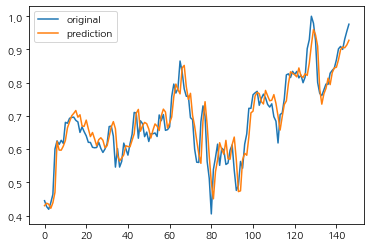

In [17]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()